## Objectives

* The main objective off our Data Filtering is to have variables properly available for study before Exploratory Data Analysis (EDA)
*  Create new variables that can help our future clusters
*  Initial EDA and dimensionality reduction

# 2.0 Data Filtering

## 2.1 Data Inspection

In [ ]:
df2 = df1.copy()

### Invoice Number

In [ ]:
# selecting all non digits
df_invoice = df2.loc[ df2['invoice_no'].apply( lambda x: bool(re.search( '\D+', x )) )]
df_invoice.head(10)

invoice_no stock_code                        description  quantity invoice_date  unit_price  customer_id         country
141    C536379          D                           Discount        -1   2016-11-29       27.50        14527  United Kingdom
154    C536383     35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   2016-11-29        4.65        15311  United Kingdom
235    C536391      22556     PLASTERS IN TIN CIRCUS PARADE        -12   2016-11-29        1.65        17548  United Kingdom
236    C536391      21984   PACK OF 12 PINK PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
237    C536391      21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
238    C536391      21980  PACK OF 12 RED RETROSPOT TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
239    C536391      21484        CHICK GREY HOT WATER BOTTLE       -12   2016-11-29        3.45        17548  United Kingdom
240    C536391      22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   2016-11-29        1.65        17548  United Kingdom
241    C536391      22553             PLASTERS IN TIN SKULLS       -24   2016-11-29        1.65        17548  United Kingdom
939    C536506      22960           JAM MAKING SET WITH JARS        -6   2016-11-29        4.25        17897  United Kingdom

In [ ]:
df_invoice['quantity'].max()

# invoices that contain C are probably a chargeback operation
# all quantities are negative

-1

In [ ]:
# selecting all non digits
df_invoice = df2.loc[ df2['invoice_no'].apply( lambda x: bool(re.search( '^[\D]+$', x )) )]
df_invoice.head(10)

Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_date, unit_price, customer_id, country]
Index: []

### Stock Code

In [ ]:
# selecting rows with at least 1 occurrence of non digit
df_stock = df2.loc[df2['stock_code'].apply( lambda x: bool( re.search( '\D+' , x) ) )]
df_stock.head(10)


invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
0      536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55        17850  United Kingdom
2      536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75        17850  United Kingdom
3      536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39        17850  United Kingdom
4      536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39        17850  United Kingdom
45     536370       POST                              POSTAGE         3   2016-11-29       18.00        12583          France
49     536373     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55        17850  United Kingdom
51     536373     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75        17850  United Kingdom
60     536373     82494L          WOODEN FRAME ANTIQUE WHITE          6   2016-11-29        2.55        17850  United Kingdom
61     536373     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39        17850  United Kingdom
62     536373     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39        17850  United Kingdom

In [ ]:
# selecting rows with only non digits
df_stock = df2.loc[df2['stock_code'].apply( lambda x: bool(re.search('^[\D]+$', x)) )]
df_stock.head(10)

invoice_no    stock_code   description  quantity invoice_date  unit_price  customer_id         country
45       536370          POST       POSTAGE         3   2016-11-29       18.00        12583          France
141     C536379             D      Discount        -1   2016-11-29       27.50        14527  United Kingdom
386      536403          POST       POSTAGE         1   2016-11-29       15.00        12791     Netherlands
1123     536527          POST       POSTAGE         1   2016-11-29       18.00        12662         Germany
2239     536569             M        Manual         1   2016-11-29        1.25        16274  United Kingdom
2250     536569             M        Manual         1   2016-11-29       18.95        16274  United Kingdom
4406     536779  BANK CHARGES  Bank Charges         1   2016-11-30       15.00        15823  United Kingdom
5073     536840          POST       POSTAGE         1   2016-11-30       18.00        12738         Germany
5258     536852          POST       POSTAGE         1   2016-12-01       18.00        12686          France
5325     536858          POST       POSTAGE         2   2016-12-01       40.00        13520     Switzerland

In [ ]:
# values to remove
drop_stock = df_stock['stock_code'].unique().tolist()

df_stock['stock_code'].value_counts()

POST            1196
M                465
D                 77
DOT               16
CRUK              16
BANK CHARGES      12
PADS               4
Name: stock_code, dtype: int64

###  Quantity

In [ ]:
# negative quantities
df2.loc[ df2['quantity'] <0 ].head(10)

invoice_no stock_code                        description  quantity invoice_date  unit_price  customer_id         country
141    C536379          D                           Discount        -1   2016-11-29       27.50        14527  United Kingdom
154    C536383     35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   2016-11-29        4.65        15311  United Kingdom
235    C536391      22556     PLASTERS IN TIN CIRCUS PARADE        -12   2016-11-29        1.65        17548  United Kingdom
236    C536391      21984   PACK OF 12 PINK PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
237    C536391      21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
238    C536391      21980  PACK OF 12 RED RETROSPOT TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
239    C536391      21484        CHICK GREY HOT WATER BOTTLE       -12   2016-11-29        3.45        17548  United Kingdom
240    C536391      22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   2016-11-29        1.65        17548  United Kingdom
241    C536391      22553             PLASTERS IN TIN SKULLS       -24   2016-11-29        1.65        17548  United Kingdom
939    C536506      22960           JAM MAKING SET WITH JARS        -6   2016-11-29        4.25        17897  United Kingdom

In [ ]:
df2[df2['invoice_no'] == 'C536391']

# #invoice_no I believe it's the return on different purchases

invoice_no stock_code                        description  quantity invoice_date  unit_price  customer_id         country
235    C536391      22556     PLASTERS IN TIN CIRCUS PARADE        -12   2016-11-29        1.65        17548  United Kingdom
236    C536391      21984   PACK OF 12 PINK PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
237    C536391      21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
238    C536391      21980  PACK OF 12 RED RETROSPOT TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
239    C536391      21484        CHICK GREY HOT WATER BOTTLE       -12   2016-11-29        3.45        17548  United Kingdom
240    C536391      22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   2016-11-29        1.65        17548  United Kingdom
241    C536391      22553             PLASTERS IN TIN SKULLS       -24   2016-11-29        1.65        17548  United Kingdom

Some returns were made in periods prior to the dataset generation. So this could be an error

In [ ]:
df2[df2['customer_id'] == 17548].sort_values('stock_code')

invoice_no stock_code                        description  quantity invoice_date  unit_price  customer_id         country
239       C536391      21484        CHICK GREY HOT WATER BOTTLE       -12   2016-11-29        3.45        17548  United Kingdom
238       C536391      21980  PACK OF 12 RED RETROSPOT TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
237       C536391      21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
236       C536391      21984   PACK OF 12 PINK PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
177227    C552049      22079         RIBBON REEL HEARTS DESIGN        -10   2017-05-04        1.65        17548  United Kingdom
165027     550755      22079         RIBBON REEL HEARTS DESIGN         10   2017-04-18        1.65        17548  United Kingdom
165026     550755      22081         RIBBON REEL FLORA + FAUNA         10   2017-04-18        1.65        17548  United Kingdom
177226    C552049      22081         RIBBON REEL FLORA + FAUNA        -10   2017-05-04        1.65        17548  United Kingdom
177225    C552049      22082        RIBBON REEL STRIPES DESIGN        -10   2017-05-04        1.65        17548  United Kingdom
165025     550755      22082        RIBBON REEL STRIPES DESIGN         10   2017-04-18        1.65        17548  United Kingdom
241       C536391      22553             PLASTERS IN TIN SKULLS       -24   2016-11-29        1.65        17548  United Kingdom
235       C536391      22556     PLASTERS IN TIN CIRCUS PARADE        -12   2016-11-29        1.65        17548  United Kingdom
240       C536391      22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   2016-11-29        1.65        17548  United Kingdom
177224    C552049      22585          PACK OF 6 BIRDY GIFT TAGS       -24   2017-05-04        1.25        17548  United Kingdom
165024     550755      22585          PACK OF 6 BIRDY GIFT TAGS        24   2017-04-18        1.25        17548  United Kingdom
165028     550755      22926     IVORY GIANT GARDEN THERMOMETER         4   2017-04-18        5.95        17548  United Kingdom
177223    C552049      22926     IVORY GIANT GARDEN THERMOMETER        -4   2017-05-04        5.95        17548  United Kingdom

In [ ]:
df2.sort_values( 'quantity' ).head(10)

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
540422    C581484      23843          PAPER CRAFT , LITTLE BIRDIE    -80995   2017-12-07        2.08        16446  United Kingdom
61624     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   2017-01-16        1.04        12346  United Kingdom
4287      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   2016-11-30        0.03        15838  United Kingdom
160145    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   2017-04-16        2.10        15749  United Kingdom
160144    C550456      21175          GIN + TONIC DIET METAL SIGN     -2000   2017-04-16        1.85        15749  United Kingdom
160143    C550456     85123A   WHITE HANGING HEART T-LIGHT HOLDER     -1930   2017-04-16        2.55        15749  United Kingdom
224419    C556522      22920                    HERB MARKER BASIL     -1515   2017-06-11        0.55        16938  United Kingdom
187609    C552995          M                               Manual     -1350   2017-05-10        0.16        18133  United Kingdom
160142    C550456     47566B               TEA TIME PARTY BUNTING     -1300   2017-04-16        2.55        15749  United Kingdom
390548    C570556      20971     PINK BLUE FELT CRAFT TRINKET BOX     -1296   2017-10-09        1.06        16029  United Kingdom

In [ ]:
df2[df2.customer_id == 15749].sort_values('stock_code', ascending = True)

# it appears this customer indeed bought and returned these products

invoice_no stock_code                         description  quantity invoice_date  unit_price  customer_id         country
52711      540815      21108  FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   2017-01-09        2.10        15749  United Kingdom
160145    C550456      21108  FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   2017-04-16        2.10        15749  United Kingdom
160546     550461      21108  FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   2017-04-16        2.10        15749  United Kingdom
52710      540815      21175         GIN + TONIC DIET METAL SIGN      2000   2017-01-09        1.85        15749  United Kingdom
160144    C550456      21175         GIN + TONIC DIET METAL SIGN     -2000   2017-04-16        1.85        15749  United Kingdom
160545     550461      21175         GIN + TONIC DIET METAL SIGN      2000   2017-04-16        1.69        15749  United Kingdom
52771      540818     47556B                TEA TIME TEA TOWELS       1300   2017-01-09        2.55        15749  United Kingdom
160543     550461     47556B                TEA TIME TEA TOWELS       1300   2017-04-16        2.10        15749  United Kingdom
160142    C550456     47566B              TEA TIME PARTY BUNTING     -1300   2017-04-16        2.55        15749  United Kingdom
52772      540818      48185                  DOORMAT FAIRY CAKE       670   2017-01-09        6.75        15749  United Kingdom
160141    C550456      48185                  DOORMAT FAIRY CAKE      -670   2017-04-16        6.75        15749  United Kingdom
160544     550461      48185                  DOORMAT FAIRY CAKE       670   2017-04-16        6.35        15749  United Kingdom
52709      540815     85123A  WHITE HANGING HEART T-LIGHT HOLDER      1930   2017-01-09        2.55        15749  United Kingdom
160143    C550456     85123A  WHITE HANGING HEART T-LIGHT HOLDER     -1930   2017-04-16        2.55        15749  United Kingdom
160542     550461     85123A  WHITE HANGING HEART T-LIGHT HOLDER      1930   2017-04-16        2.40        15749  United Kingdom

### Description

In [ ]:
df2.sort_values('quantity', ascending = False).head(10)

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
540421     581483      23843          PAPER CRAFT , LITTLE BIRDIE     80995   2017-12-07        2.08        16446  United Kingdom
61619      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   2017-01-16        1.04        12346  United Kingdom
502122     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   2017-11-23        0.00        13256  United Kingdom
421632     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   2017-10-25        0.21        12901  United Kingdom
206121     554868      22197                 SMALL POPCORN HOLDER      4300   2017-05-25        0.72        13135  United Kingdom
97432      544612      22053                EMPIRE DESIGN ROSETTE      3906   2017-02-20        0.82        18087  United Kingdom
270885     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   2017-07-17        0.06        14609  United Kingdom
160546     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   2017-04-16        2.10        15749  United Kingdom
52711      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   2017-01-09        2.10        15749  United Kingdom
433788     573995      16014          SMALL CHINESE STYLE SCISSOR      3000   2017-10-31        0.32        16308  United Kingdom

In [ ]:
df2['description'].nunique()

# nothing obvious to do with this feature in this cycle

3896

### Unit Price

In [ ]:
df2.loc[df2['unit_price'] == 0]

# I don't know why some prices are zero. For now, I'll remove theese

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
9302       537197      22841         ROUND CAKE TIN VINTAGE GREEN         1   2016-12-03         0.0        12647         Germany
33576      539263      22580         ADVENT CALENDAR GINGHAM SACK         4   2016-12-14         0.0        16560  United Kingdom
40089      539722      22423             REGENCY CAKESTAND 3 TIER        10   2016-12-19         0.0        14911            EIRE
47068      540372      22090              PAPER BUNTING RETROSPOT        24   2017-01-04         0.0        13081  United Kingdom
47070      540372      22553               PLASTERS IN TIN SKULLS        24   2017-01-04         0.0        13081  United Kingdom
56674      541109      22168        ORGANISER WOOD ANTIQUE WHITE          1   2017-01-11         0.0        15107  United Kingdom
86789      543599     84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   2017-02-08         0.0        17560  United Kingdom
130188     547417      22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   2017-03-21         0.0        13239  United Kingdom
139453     548318      22055   MINI CAKE STAND  HANGING STRAWBERY         5   2017-03-28         0.0        13113  United Kingdom
145208     548871      22162          HEART GARLAND RUSTIC PADDED         2   2017-04-02         0.0        14410  United Kingdom
157042     550188      22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   2017-04-12         0.0        12457     Switzerland
187613     553000      47566                        PARTY BUNTING         4   2017-05-10         0.0        17667  United Kingdom
198383     554037      22619            SET OF 6 SOLDIER SKITTLES        80   2017-05-18         0.0        12415       Australia
279324     561284      22167           OVAL WALL MIRROR DIAMANTE          1   2017-07-24         0.0        16818  United Kingdom
282912     561669      22960             JAM MAKING SET WITH JARS        11   2017-07-26         0.0        12507           Spain
285657     561916          M                               Manual         1   2017-07-30         0.0        15581  United Kingdom
298054     562973      23157           SET OF 6 NATIVITY MAGNETS        240   2017-08-09         0.0        14911            EIRE
314745     564651      23270     SET OF 2 CERAMIC PAINTED HEARTS         96   2017-08-24         0.0        14646     Netherlands
314746     564651      23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   2017-08-24         0.0        14646     Netherlands
314747     564651      22955             36 FOIL STAR CAKE CASES        144   2017-08-24         0.0        14646     Netherlands
314748     564651      21786                   POLKADOT RAIN HAT        144   2017-08-24         0.0        14646     Netherlands
358655     568158       PADS           PADS TO MATCH ALL CUSHIONS         1   2017-09-23         0.0        16133  United Kingdom
361825     568384          M                               Manual         1   2017-09-25         0.0        12748  United Kingdom
379913     569716      22778                   GLASS CLOCHE SMALL         2   2017-10-04         0.0        15804  United Kingdom
395529     571035          M                               Manual         1   2017-10-11         0.0        12446             RSA
420404     572893      21208          PASTEL COLOUR HONEYCOMB FAN         5   2017-10-24         0.0        18059  United Kingdom
436428     574138      23234        BISCUIT TIN VINTAGE CHRISTMAS       216   2017-11-01         0.0        12415       Australia
436597     574175      22065       CHRISTMAS PUDDING TRINKET POT         12   2017-11-01         0.0        14110  United Kingdom
436961     574252          M                               Manual         1   2017-11-01         0.0        12437          France
439361     574469      22385            JUMBO BAG SPACEBOY DESIGN        12   2017-11-02         0.0       

In [ ]:
# checking some customers
df2.loc[(df2.customer_id == 12444) & (df2.stock_code == '23407')]

invoice_no stock_code                     description  quantity invoice_date  unit_price  customer_id country
393051     570793      23407  SET OF 2 TRAYS HOME SWEET HOME         2   2017-10-10        9.95        12444  Norway
480629     577314      23407  SET OF 2 TRAYS HOME SWEET HOME         2   2017-11-16        9.95        12444  Norway
480649     577314      23407  SET OF 2 TRAYS HOME SWEET HOME         2   2017-11-16        0.00        12444  Norway

In [ ]:
df2.loc[(df2['unit_price'] < 0.1) & (df2['unit_price'] != 0) ].sort_values('unit_price').head()

invoice_no    stock_code                 description  quantity invoice_date  unit_price  customer_id         country
157195     550193          PADS  PADS TO MATCH ALL CUSHIONS         1   2017-04-13       0.001        13952  United Kingdom
279045     561226          PADS  PADS TO MATCH ALL CUSHIONS         1   2017-07-24       0.001        15618  United Kingdom
361741     568375  BANK CHARGES                Bank Charges         1   2017-09-24       0.001        13405  United Kingdom
359871     568200          PADS  PADS TO MATCH ALL CUSHIONS         1   2017-09-23       0.001        16198  United Kingdom
108088    C545478             D                    Discount      -720   2017-03-01       0.010        16422  United Kingdom

In [ ]:
df2.sort_values( 'unit_price', ascending = False).head()

invoice_no stock_code description  quantity invoice_date  unit_price  customer_id         country
222681    C556445          M      Manual        -1   2017-06-08    38970.00        15098  United Kingdom
173382     551697       POST     POSTAGE         1   2017-05-01     8142.75        16029  United Kingdom
173277    C551685       POST     POSTAGE        -1   2017-05-01     8142.75        16029  United Kingdom
173391    C551699          M      Manual        -1   2017-05-01     6930.00        16029  United Kingdom
268027    C560372          M      Manual        -1   2017-07-16     4287.63        17448  United Kingdom

### Country

In [ ]:
#df2['country'].value_counts(normalize = True)
df2['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
#countries to drop
drop_country = ['Unspecified', 'European Community']

## 2.2 Data Filtering

In [ ]:
# dropping stock code
df2 = df2.loc[~ df2['stock_code'].isin(drop_stock)]

# dropping countries
df2 = df2.loc[~ df2['country'].isin(drop_country)]

# price == 0

# separating returns from purchases
df_returns = df2.loc[ df2['quantity'] < 0 ]
df_purchases = df2.loc[ df2['quantity'] >= 0 ]

In [ ]:
df2.to_csv('df2.csv', index = False)

# 3.0 Feature Engineering

**Feature engineering is a machine learning technique that leverages data to create new ways for models in the future to learn from current features - which can be transformed**

Now let's focus on purchases focusing on frequency, monetary values ​​and how recent they were (without considering as returns)

In [ ]:
# Reading Data
df3 = df2.copy()

#df3 = pd.read_csv('../data/interim/df2.csv', float_precision='round_trip')
df3['invoice_date'] = pd.to_datetime( df3['invoice_date'] )

# separating returns from purchases
df_returns = df3.loc[ df3['quantity'] < 0 ]
df_purchases = df3.loc[ df3['quantity'] >= 0 ]

### Recency

In [ ]:
# days since last purchase (considering first day as day after last invoice)
df_recency = df_purchases[['customer_id', 'invoice_date']].copy()
df_recency = df_recency.drop_duplicates(subset = 'customer_id', keep = 'last')

# using final date as max date + 1
df_recency['recency'] =  (pd.to_datetime('2017-12-08') - df_recency['invoice_date']).dt.days
df_recency.drop(columns=['invoice_date'], inplace = True)


### Average Days Between Purchases

In [ ]:
df_dates = df_purchases[['customer_id', 'invoice_date']].copy()

# creates a column with the dates shifted by 1 to calculate difference betwenn last purchase and previous purchase
df_dates = df_dates.drop_duplicates()
df_dates['previous_date'] = df_dates.groupby('customer_id')['invoice_date'].shift()

# # extracts days betwenn last purchase and previous purchase for each pair of dates
df_dates['days'] = df_dates.apply(lambda x : (x['invoice_date'] - x['previous_date']).days , axis = 1 )

# # calculating average of days between purchases
df_dates = df_dates[['customer_id', 'days']].groupby('customer_id').mean().reset_index().rename(columns = {'days': 'avg_days_bw_purchases'})

df_dates.fillna(value = 0, inplace = True)
# df_dates.isna().sum()
# df_dates[df_dates.customer_id == 12346] #.mean()
# df_dates.head()

### Frequency

In [ ]:
# Frequency
# nº of purchases a customer did
df_freq = df_purchases[['invoice_no', 'customer_id']].drop_duplicates('invoice_no').groupby(['customer_id']).count().reset_index().rename(columns = {'invoice_no' : 'num_purchases'} ) #'invoice_date',  #['num_of_purchases']

# difference between firts and last transaction
# if nº purchases made = 1: date range =  today - first purchase date
# else last purchase - first purchase
func = lambda x: (x.max() - x.min() if (x.max() - x.min()).days != 0 else pd.to_datetime('2017-12-08') - x.min() ).days

# aggregating things
df_date_range = df_purchases[[ 'customer_id', 'invoice_date' ]].groupby('customer_id').agg( func ).reset_index().rename(columns = {'invoice_date' : 'date_range'})

df_freq = df_freq.merge(df_date_range, on = 'customer_id', how = 'left')
df_freq['frequency'] = df_freq['num_purchases']/df_freq['date_range']

# df_freq.head()

### Revenue

In [ ]:
# revenue
# copying from original dataset so that revenue represents net earnings (purchases - returns)
df_revenue = df3[['unit_price','quantity','customer_id']].copy()
df_revenue['quantity'] = df_revenue['quantity'].astype(float)
df_revenue['customer_spend'] = df_revenue['unit_price']*df_revenue['quantity']

# calculating revenue
df_revenue = df_revenue[['customer_id', 'customer_spend']].groupby('customer_id').sum().reset_index().rename(columns = {'customer_spend' : 'revenue'})

# defining number of purchases
df_revenue = df_revenue.merge( df_freq[['customer_id', 'num_purchases']], on = 'customer_id', how = 'left' )

# calculating avg ticket
df_revenue['avg_ticket'] = df_revenue['revenue']/df_revenue['num_purchases']
df_revenue.drop('num_purchases', axis = 1, inplace = True)

# # deleting rows that we have data about return and not about purchase (purchase outside time frame of dataset)
df_revenue = df_revenue[ df_revenue['revenue'] > 0.1 ].copy()
# df_revenue.head()

### Basket Size

In [ ]:
# selecting cols
df_basket = df3[['customer_id', 'invoice_no', 'quantity']].copy()

# counting items per invoice
df_basket = df_basket.groupby(['customer_id', 'invoice_no']).sum().reset_index()

# calculating quantity of items purchased + avg basket size (men of quantities)
df_basket = df_basket.groupby(['customer_id']).agg( qty_items = ('quantity', 'sum'), avg_basket_size = ('quantity', 'mean') ).reset_index()

# renaming
df_basket = df_basket.rename( columns = {'quantity' : 'avg_basket_size'})

# df_basket.head()

### Average Unique Products Purchased Quantity

In [ ]:
# selecting cols
df_unique = df_purchases[['customer_id', 'invoice_no', 'stock_code']].copy()

# counting number of different products per invoice
df_unique = df_unique.groupby(['customer_id', 'invoice_no']).nunique().reset_index()

# calculating mean of items per invoice
df_unique = df_unique.groupby(['customer_id']).mean().reset_index()

# # renaming
df_unique = df_unique.rename( columns = {'stock_code' : 'avg_unique_prods'})

# df_unique.head()

In [ ]:
# # ATTEMPT THIS LATER IF THERE'S TIME
# ### Avg Amount of New Products Purchased
# df_basket = df_purchases[['customer_id', 'invoice_no', 'stock_code']].copy()

# # df_basket = df_basket.groupby(['customer_id', 'invoice_no']).count().reset_index()

# # df_basket = df_basket.groupby(['customer_id', 'invoice_no']).nunique().reset_index()

# # 12347
# # df_basket.head(10)
# a = df_basket[df_basket.customer_id.isin([17850,12348]) ] #.stock_code.unique()
# a.invoice_no.unique()

# # a['list'] = a.apply(lambda x: append.(x['stock_code']), axis = 0 )

# # a['list'] = a.groupby('invoice_no')['stock_code'].unique()

# a = df_basket[df_basket.customer_id.isin([17850,12348]) ].copy() #.stock_code.unique()

# # a.groupby('invoice_no')['stock_code'].unique()

# # g = a.groupby( 'customer_id')['invoice_no', 'stock_code'].apply(lambda x: list(np.unique(x)))
# g = a.groupby( ['customer_id', 'invoice_no'])[ 'stock_code'].apply(lambda x: list(np.unique(x)))
# g = pd.DataFrame(g).reset_index()
# # g = g.reset_index()
# g.head()

# df_basket.head()
# df_aux = ( df_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
#                                                                             .agg( n_purchase=( 'invoice_no', 'nunique'),
#                                                                                    n_products=( 'stock_code', 'nunique' ) )
#                                                                             .reset_index() )
# df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']
# df_aux.head()                                                                            

### Returns

In [ ]:
# creating returns variables

df_returns = df_returns[['quantity', 'invoice_date', 'unit_price', 'customer_id', 'invoice_no']]

df_returns['customer_spend'] = df_returns['unit_price']*df_returns['quantity']

# sum and mean of revenue
df_returns_metrics = df_returns[['customer_id', 'customer_spend', 'quantity']].groupby('customer_id').agg( 
    returns_revenue = ('customer_spend', 'sum'),
    avg_return_revenue = ('customer_spend', 'mean'),
    num_returns = ('customer_spend', 'count'),
    qty_returned = ('quantity', 'sum')  )

df_returns_metrics = pd.DataFrame( df_returns_metrics.to_records() )

# df_returns_metrics.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Merging every feature together

In [ ]:


df_processed = df_purchases[['customer_id', 'country']].drop_duplicates('customer_id').copy()
df_processed = pd.merge( df_processed, df_recency, on = 'customer_id', how = 'left' )
df_processed = pd.merge( df_processed, df_dates, on = 'customer_id', how = 'left' )
df_processed = pd.merge( df_processed, df_freq, on = 'customer_id', how = 'left' )
df_processed = pd.merge( df_processed, df_revenue, on = 'customer_id', how = 'inner' )
df_processed = pd.merge( df_processed, df_basket, on = 'customer_id', how = 'left' )
df_processed = pd.merge( df_processed, df_unique, on = 'customer_id', how = 'left' )
df_processed = pd.merge( df_processed, df_returns_metrics, on = 'customer_id', how = 'left' )


# filling na as 0 for customers that never returned an item
df_processed.fillna(value = 0, inplace = True)


# df_processed.dropna( inplace = True)
# df_processed.shape
# df_processed.isna().sum()
# df_processed.head(10)

In [ ]:
# df_processed.to_csv('df3_processed.csv', index = False)

# 4.0 Exploratory Data Analysis

In [ ]:
# Reading filtered data
# df4 = pd.read_csv('../data/processed/df3_processed.csv')
df4 = df_processed.copy()

## 4.1 Univariate Analysis

To make EDA easier and faster, we can count on the help of pandas' powerful ProfileReport method!

In [ ]:
#profile = ProfileReport(df4)
# profile.to_file(features_report_v3.html) 

### 4.1.1 Revenue

In [ ]:
df4.sort_values('revenue', ascending = False).head(10)

customer_id         country  recency  avg_days_bw_purchases  \
844        14646     Netherlands        2               8.022727   
419        18102  United Kingdom        1              14.680000   
372        17450  United Kingdom        9              13.807692   
65         14911            EIRE        2               2.861538   
912        12415       Australia       25              22.357143   
199        14156            EIRE       10               8.619048   
15         17511  United Kingdom        3              13.740741   
800        16684  United Kingdom        5              23.600000   
35         13694  United Kingdom        4              10.882353   
8          15311  United Kingdom        1               4.191011   

     num_purchases  date_range  frequency    revenue   avg_ticket  qty_items  \
844             73         353   0.206799  278778.02  3818.876986     197132   
419             60         367   0.163488  259657.30  4327.621667      64124   
372             46         359   0.128134  189735.53  4124.685435      69041   
65             199         372   0.534946  133007.13   668.377538      77181   
912             20         313   0.063898  123638.18  6181.909000      77242   
199             55         362   0.151934  114505.32  2081.914909      57026   
15              31         371   0.083558   88138.20  2843.167742      63014   
800             28         354   0.079096   65920.12  2354.290000      49391   
35              50         370   0.135135   62924.10  1258.482000      61808   
8               91         373   0.243968   59419.34   652.959780      37720   

     avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  \
844      2663.945946         28.273973          -360.00         -180.000000   
419      1068.733333          7.183333             0.00            0.000000   
372      1409.000000          7.304348         -4815.26        -1605.086667   
65        317.617284         28.492462         -7443.59          -33.379327   
912      3218.416667         35.750000          -926.35          -15.186066   
199       877.323077         25.327273         -2874.31         -151.279474   
15       1400.311111         31.064516         -2924.18          -26.343964   
800      1646.366667          9.892857          -733.44         -244.480000   
35       1084.350877         11.360000         -2115.52         -151.108571   
8         319.661017         25.901099         -1348.56          -12.040714   

     num_returns  qty_returned  
844          2.0        -288.0  
419          0.0           0.0  
372          3.0        -952.0  
65         223.0       -3332.0  
912         61.0        -427.0  
199         19.0        -859.0  
15         111.0       -1535.0  
800          3.0        -864.0  
35          14.0       -1504.0  
8          112.0        -474.0

In [ ]:
# taking a look at the customers that bought more items and it seems like normal behaviour
df3[df3['customer_id'] == 14646]
df3[df3['customer_id'] == 18102]
df3[df3['customer_id'] == 17450]

len(df3.loc[ (df3['customer_id'] == 17450) & (df3['quantity'] < 0) ] )

3

In [ ]:
### Returns

df4.sort_values(['returns_revenue'], ascending = True).head()

# This is propably an anomaly, error, or some data purposely inserted for unknown reasons
# df3[df3.customer_id == 16446]
# df3[df3.customer_id == 12346]

# These customers indeed appear to have returned high quantities
# df3[df3.customer_id == 15749]
# df3[df3.customer_id == 16029]
# df3[df3.customer_id == 12931]

# droping weird behaviour
cust_drop = [16446, 12346]
df4 = df4[ ~ df4['customer_id'].isin(cust_drop)].copy()

In [ ]:
df4.shape

(4314, 16)

### 4.1.2 Basket Size

In [ ]:
df4.sort_values('avg_basket_size', ascending=False).head()

customer_id         country  recency  avg_days_bw_purchases  \
3393        18251  United Kingdom       88               0.000000   
2685        13135  United Kingdom      197               0.000000   
171         16754  United Kingdom      373               0.000000   
912         12415       Australia       25              22.357143   
3230        12688          Israel      114               0.000000   

      num_purchases  date_range  frequency    revenue  avg_ticket  qty_items  \
3393              1          88   0.011364    4314.72    4314.720       7824   
2685              1         197   0.005076    3096.00    3096.000       4300   
171               1         373   0.002681    2002.40    2002.400       4280   
912              20         313   0.063898  123638.18    6181.909      77242   
3230              1         114   0.008772    4873.81    4873.810       3028   

      avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  \
3393      7824.000000             16.00             0.00            0.000000   
2685      4300.000000              1.00             0.00            0.000000   
171       4280.000000              2.00             0.00            0.000000   
912       3218.416667             35.75          -926.35          -15.186066   
3230      3028.000000            171.00             0.00            0.000000   

      num_returns  qty_returned  
3393          0.0           0.0  
2685          0.0           0.0  
171           0.0           0.0  
912          61.0        -427.0  
3230          0.0           0.0

In [ ]:
df4.sort_values('avg_basket_size', ascending=True).head()

customer_id         country  recency  avg_days_bw_purchases  \
2720        17900  United Kingdom      191                    0.0   
2594        16446  United Kingdom        1                  205.0   
2158        17956  United Kingdom      250                    0.0   
1867        13452  United Kingdom      260                   11.0   
2845        16257  United Kingdom      177                    0.0   

      num_purchases  date_range  frequency  revenue  avg_ticket  qty_items  \
2720              2         191   0.010471    15.00        7.50          1   
2594              2         205   0.009756     2.90        1.45          2   
2158              1         250   0.004000    12.75       12.75          1   
1867              2          11   0.181818   590.00      295.00          2   
2845              1         177   0.005650    46.95       46.95          2   

      avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  \
2720         0.250000               3.0            -97.2              -19.44   
2594         0.666667               1.5        -168469.6          -168469.60   
2158         1.000000               1.0              0.0                0.00   
1867         1.000000               1.0              0.0                0.00   
2845         2.000000               2.0              0.0                0.00   

      num_returns  qty_returned  
2720          5.0         -72.0  
2594          1.0      -80995.0  
2158          0.0           0.0  
1867          0.0           0.0  
2845          0.0           0.0

## 4.2 Bivariate Analysis

In [ ]:
# Saving Filtered Data
# df4.to_csv('../data/processed/df4_processed.csv', index = False)

In [ ]:
df_bi = df4.select_dtypes(include=['int', 'float'])

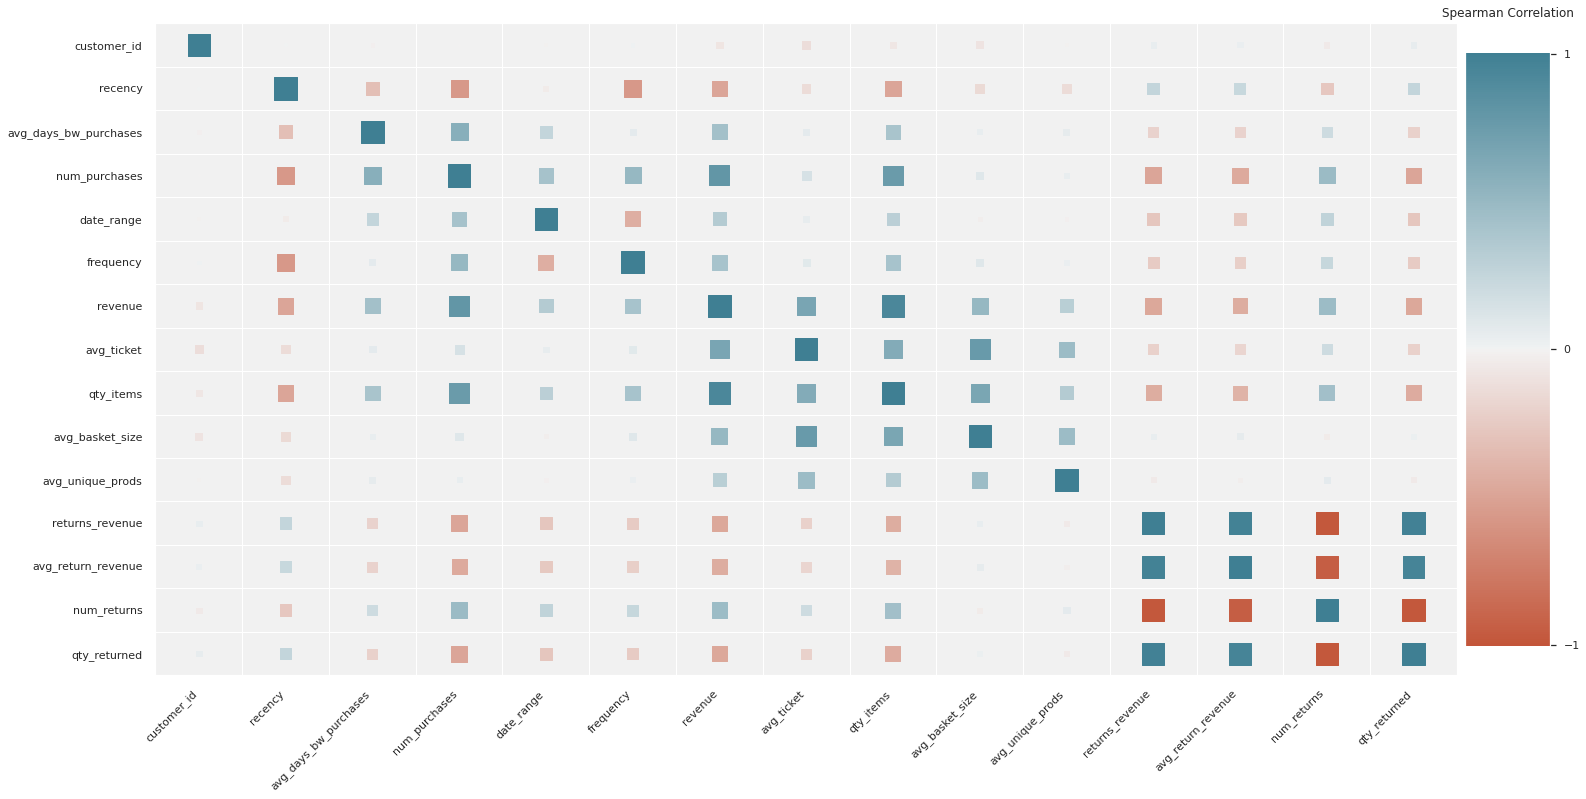

In [ ]:
corrplot( df4.corr('spearman') )
plt.title('Spearman Correlation');

Some features are moderately to highly correlated, this could be an issue for supervised learning algorithms and therefore these features should be removed if we were using such class of algorithms.

However, since we are using clustering algorithms we can't take such action based on correlation since we might be losing information.

EDA however showed that some features might not help due to low variance:
 - Avg Ticket
 - Frequency

## 4.3. Feature Selection using Boruta

In [ ]:
rf = RandomForestRegressor(n_jobs = -1, random_state = 42, max_depth = 8)

X = df4.drop(['revenue', 'country'], axis = 1).copy()
X = np.array(X)
y = df4[['revenue']]
y = np.array(y).ravel()

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	5
Iteration:

BorutaPy(estimator=RandomForestRegressor(max_depth=8, n_estimators=46,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7F0995524140),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F0995524140, verbose=2)

In [ ]:
cols = df4.drop(['revenue', 'country'], axis = 1).columns.tolist()

sup = feat_selector.support_
cols
[cols[i] for i, _ in enumerate(cols) if sup[i]]

['num_purchases',
 'avg_ticket',
 'avg_basket_size',
 'returns_revenue',
 'num_returns']

In [ ]:
rank = feat_selector.ranking_
importance = list(zip(rank, cols))
sorted(importance)


[(1, 'avg_basket_size'),
 (1, 'avg_ticket'),
 (1, 'num_purchases'),
 (1, 'num_returns'),
 (1, 'returns_revenue'),
 (2, 'qty_returned'),
 (3, 'avg_days_bw_purchases'),
 (4, 'avg_return_revenue'),
 (5, 'customer_id'),
 (6, 'frequency'),
 (7, 'avg_unique_prods'),
 (8, 'recency'),
 (9, 'date_range')]

**I attempted using Boruta to evaluate features predictive power to select features for clustering. However, the algorithm didn't seem to find relevance in possibly important features**

## 4.4 Embedded Space Analysis

### 4.4.1 Preprocessing

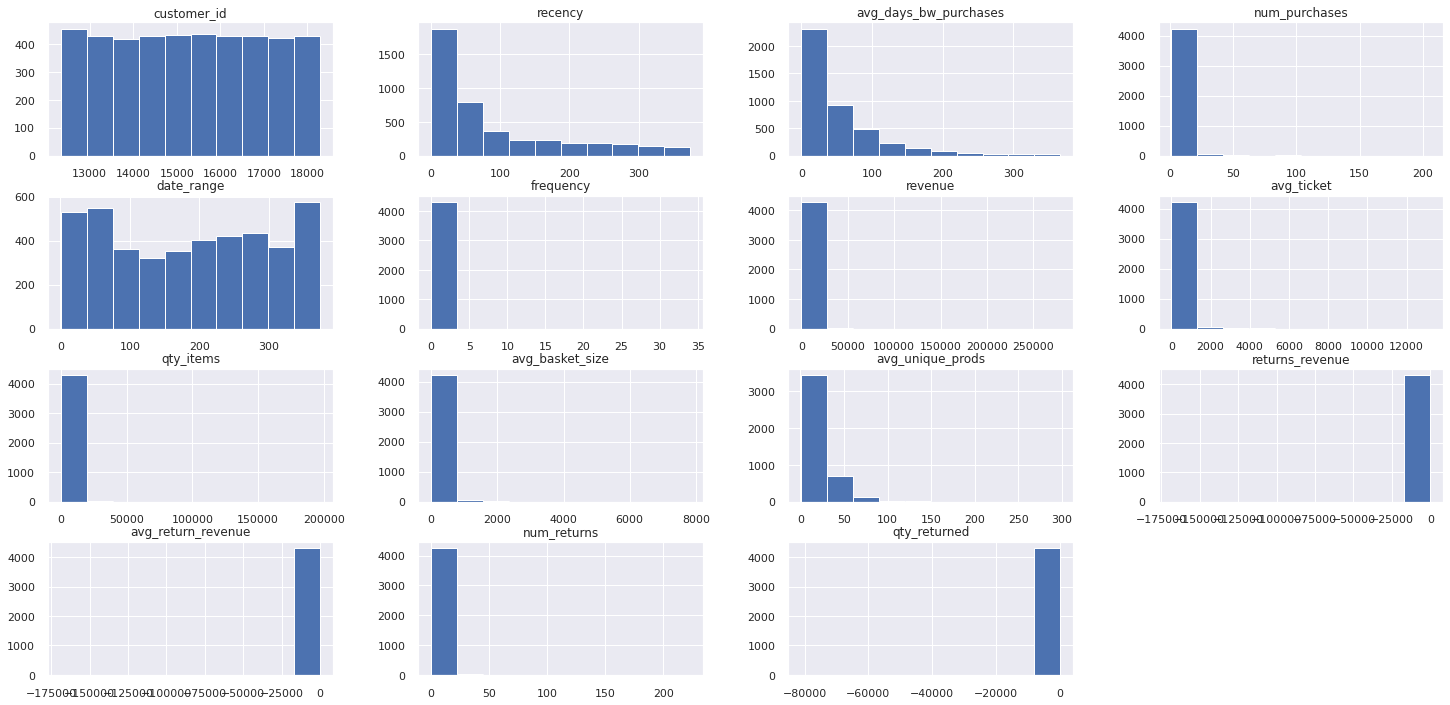

In [ ]:
df4.hist();

In [ ]:
# # selecting numerical cols
numerical_cols = df4.select_dtypes(include = ['int', 'float'] ).columns.tolist()
numerical_cols.remove('customer_id')

To avoid giving greater importance to variables with a greater range, lets normalize/change the scale of some features and prepare our dataset for the next steps

In [ ]:
numerical_cols

['recency',
 'avg_days_bw_purchases',
 'num_purchases',
 'date_range',
 'frequency',
 'revenue',
 'avg_ticket',
 'qty_items',
 'avg_basket_size',
 'avg_unique_prods',
 'returns_revenue',
 'avg_return_revenue',
 'num_returns',
 'qty_returned']

In [ ]:
# # applying min max transform
# ct = make_column_transformer( (MinMaxScaler(), numerical_cols) )
# df7 = ct.fit_transform(df4)

# testing other preprocessing 
# defining columns to be transformed
log_cols = ['recency','avg_days_bw_purchases'] 
min_max_cols = ['num_purchases','date_range','frequency','revenue', 'qty_items', 'avg_ticket','avg_basket_size','avg_unique_prods','returns_revenue','avg_return_revenue','num_returns','qty_returned']

log1p = FunctionTransformer(np.log1p)

# applying log and standard scaler to log cols
log_pipe = Pipeline(steps = [ ('log', log1p), ('std', StandardScaler()) ] )
ct_log = ColumnTransformer( transformers = [ ('log', log_pipe, log_cols) ] ) 

# applying min_max scaler to min_max cols
min_max_pipe = make_pipeline( MinMaxScaler() )

# Label Encoding and std_scaler to catgorical columns
label_pipe = make_pipeline( OrdinalEncoder(), MinMaxScaler() )

preprocessor = ColumnTransformer( 
    transformers=[ ('log', log_pipe, log_cols), 
    ('min_max', min_max_pipe, min_max_cols) ] )
df_proper = preprocessor.fit_transform(df4)

##Dimensionality reduction

### Dimensionality reduction refers to techniques for reducing the number of input variables in training data. When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data. 

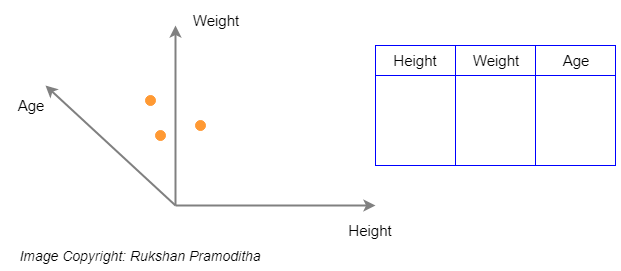

Main advantages:

*   A lower number of dimensions in data means less training time and less computational resources and increases the overall performance of machine learning algorithms
*   Dimensionality reduction avoids the problem of overfitting
*   Dimensionality reduction could be useful for data visualization



In the next section we will take the first steps in this direction.

### 4.4.2 PCA

A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). Also, could help us for data visualization and to handle clustering problems like ours. PCA factoreizes a matrix characterizing the data

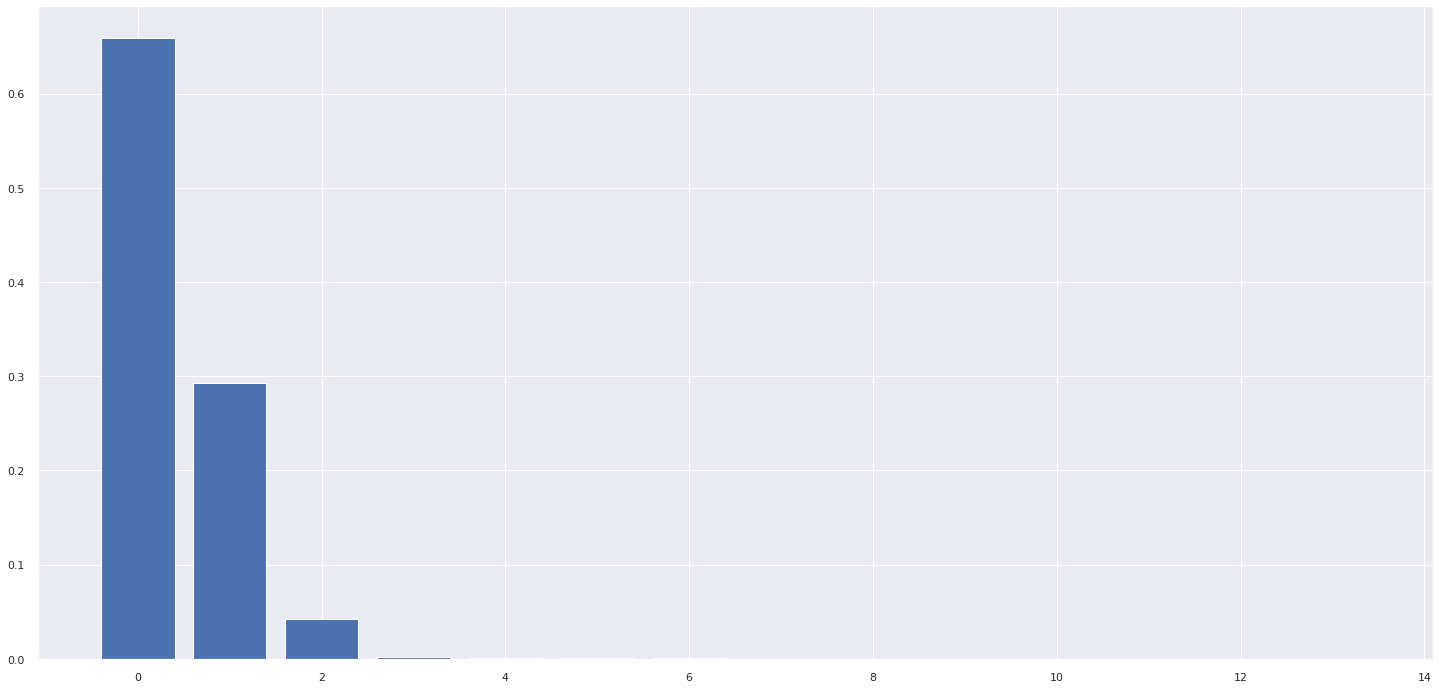

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA()
principal_components = pca.fit_transform(df_proper)

df_pca = pd.DataFrame( principal_components )

x = range(pca.n_components_)
y = pca.explained_variance_ratio_

plt.bar(x, y);

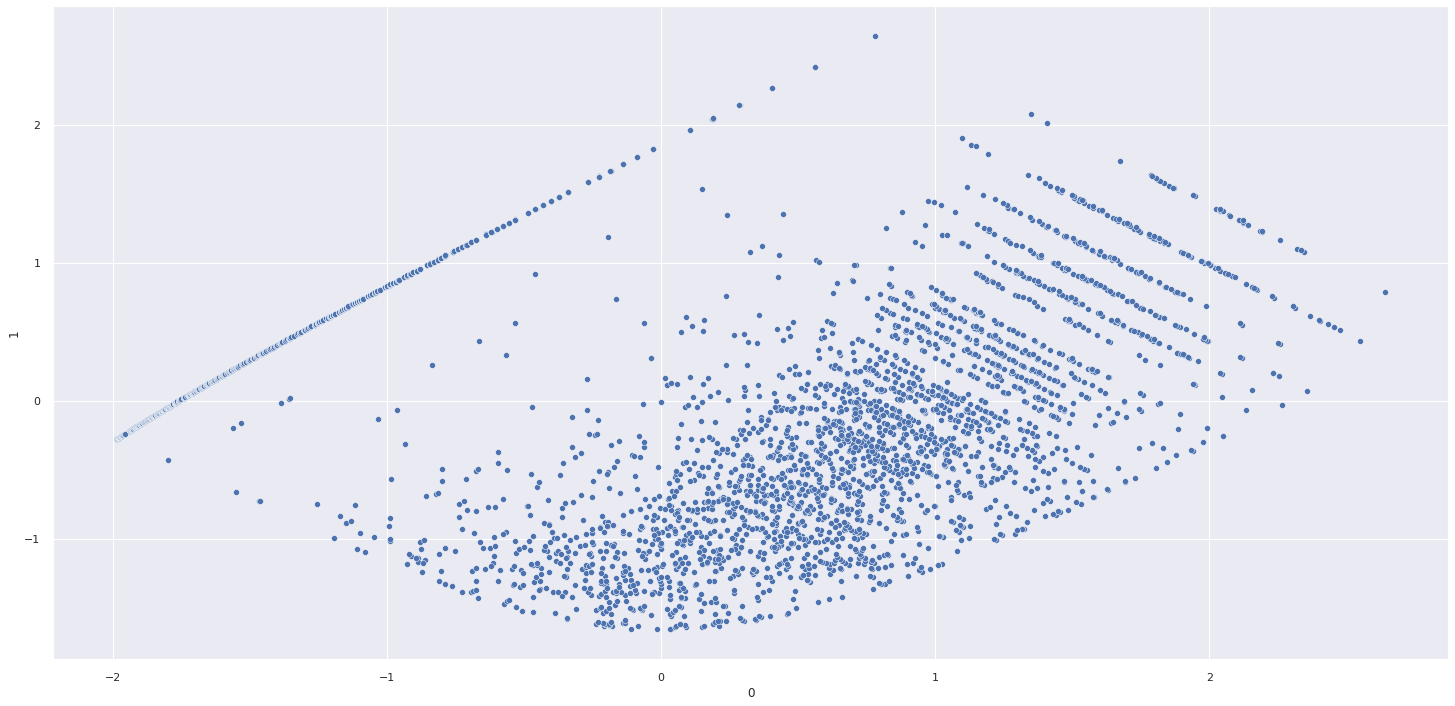

In [ ]:
sns.scatterplot(data = df_pca, x = 0, y = 1);

### 4.4.3 UMAP Embedding

UMAP is a scalable and efficient dimension reduction algorithm and widely applied for unsupervised clustering.

**We can see a reasonable separation for recenty, but not for profit. Let's keep looking for something that helps us in this regard in the next sections.**

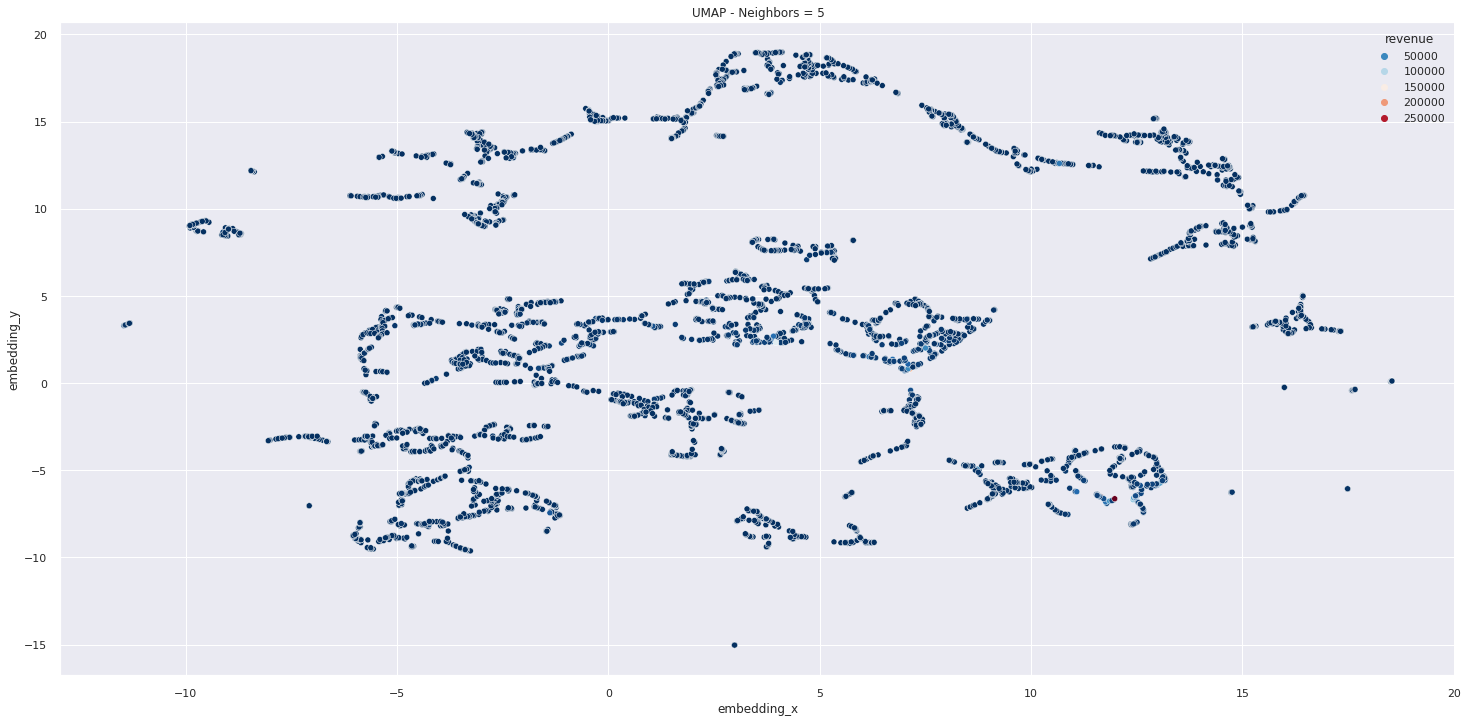

In [ ]:
# Testing UMAP for 5 neighbors
n_neighbors = 5
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_proper)

df_viz = df4.copy()
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'revenue' );

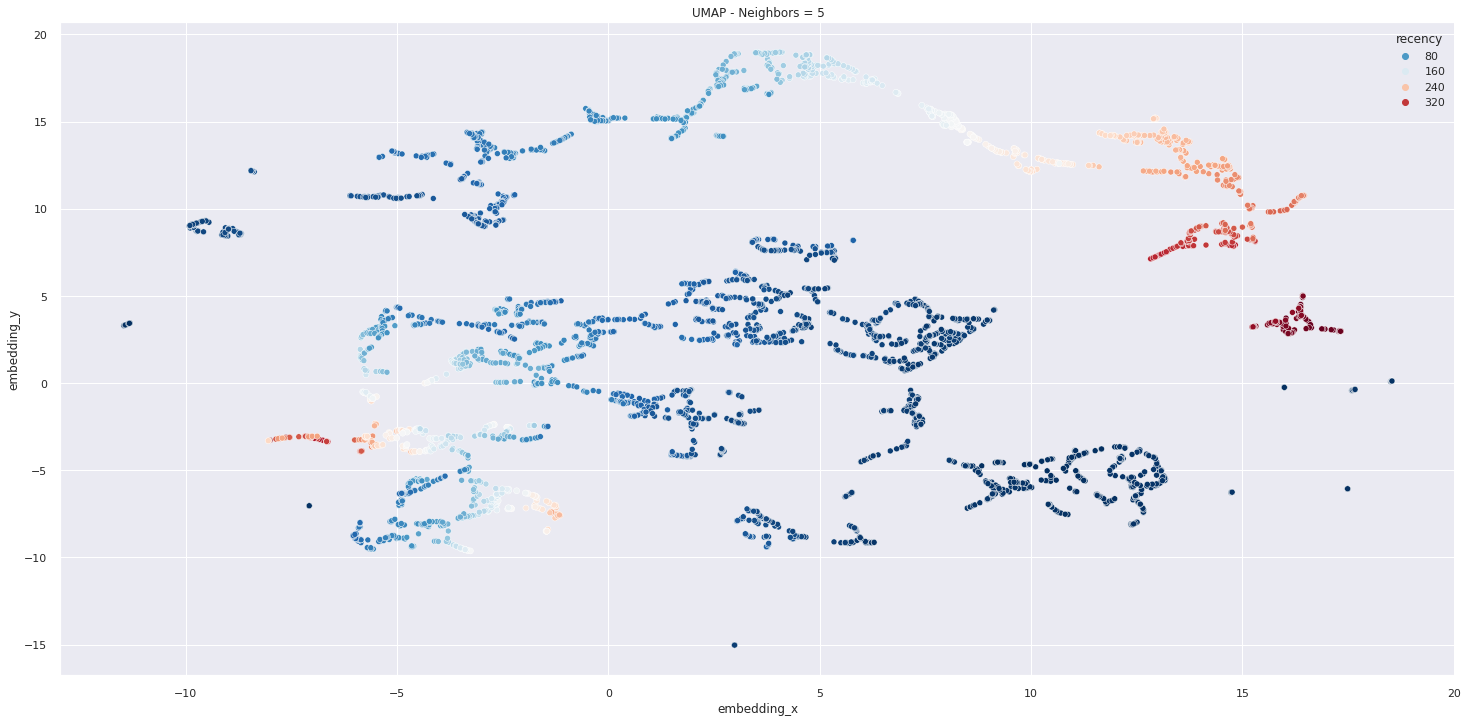

In [ ]:
cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'recency' );

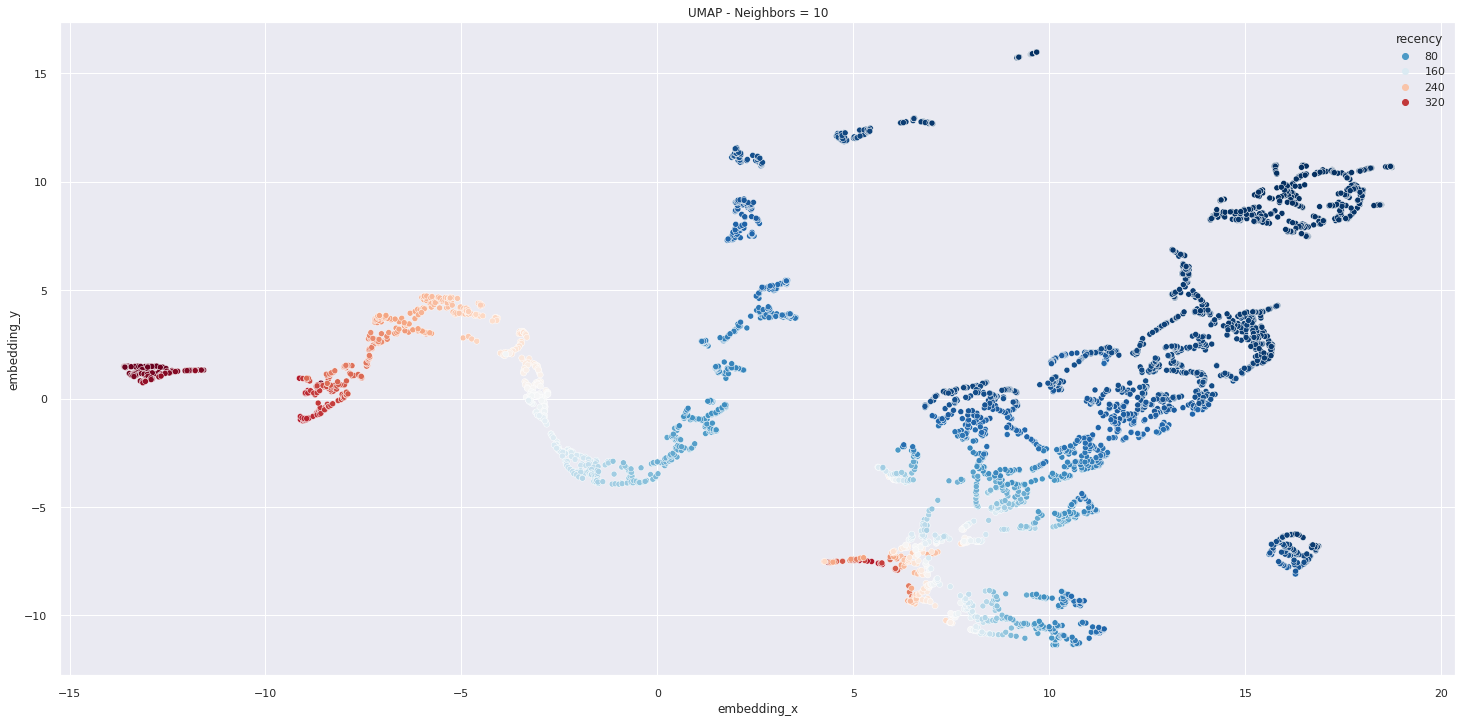

In [ ]:
# Testing UMAP for 10 neighbors
n_neighbors = 10
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_proper)

df_viz = df4.copy()
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'recency' );

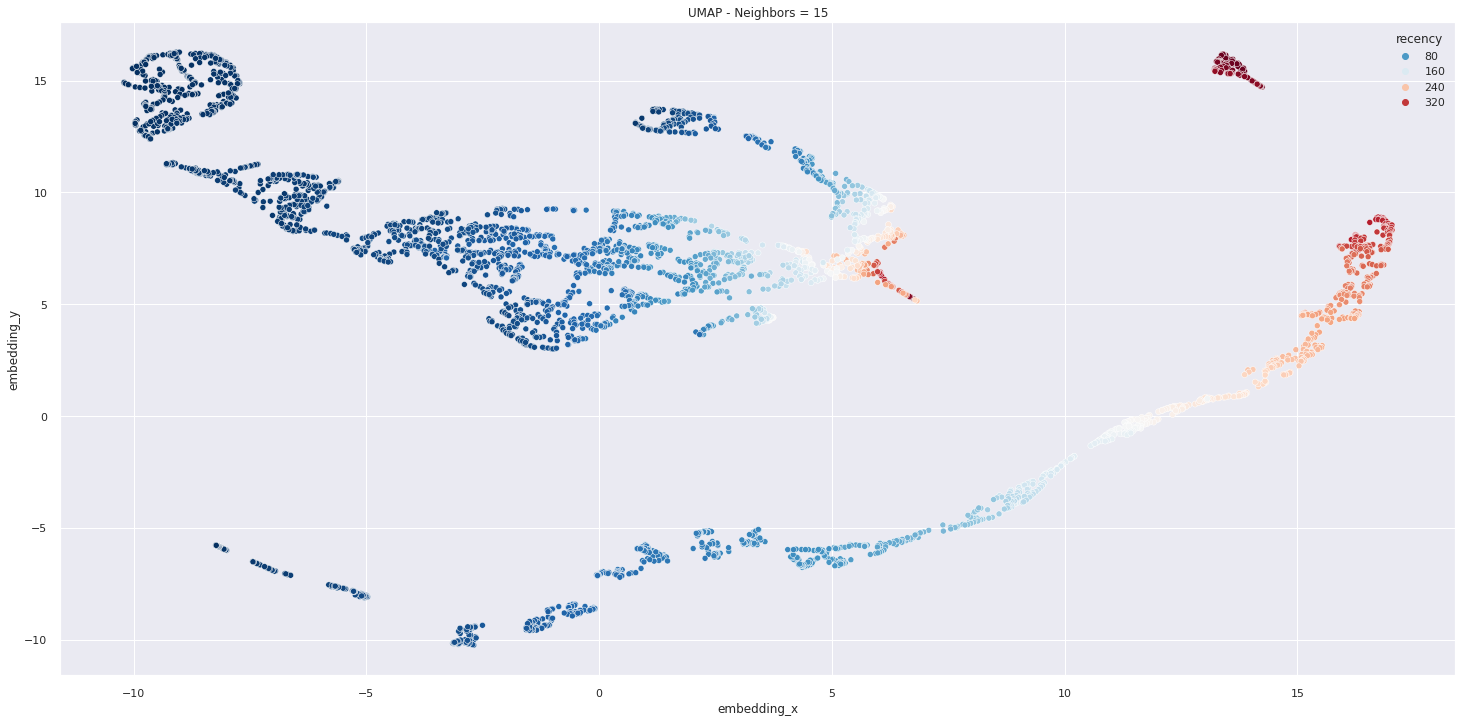

In [ ]:
# Testing UMAP for 15 neighbors
n_neighbors = 15
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_proper)

df_viz = df4.copy()
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'recency' );

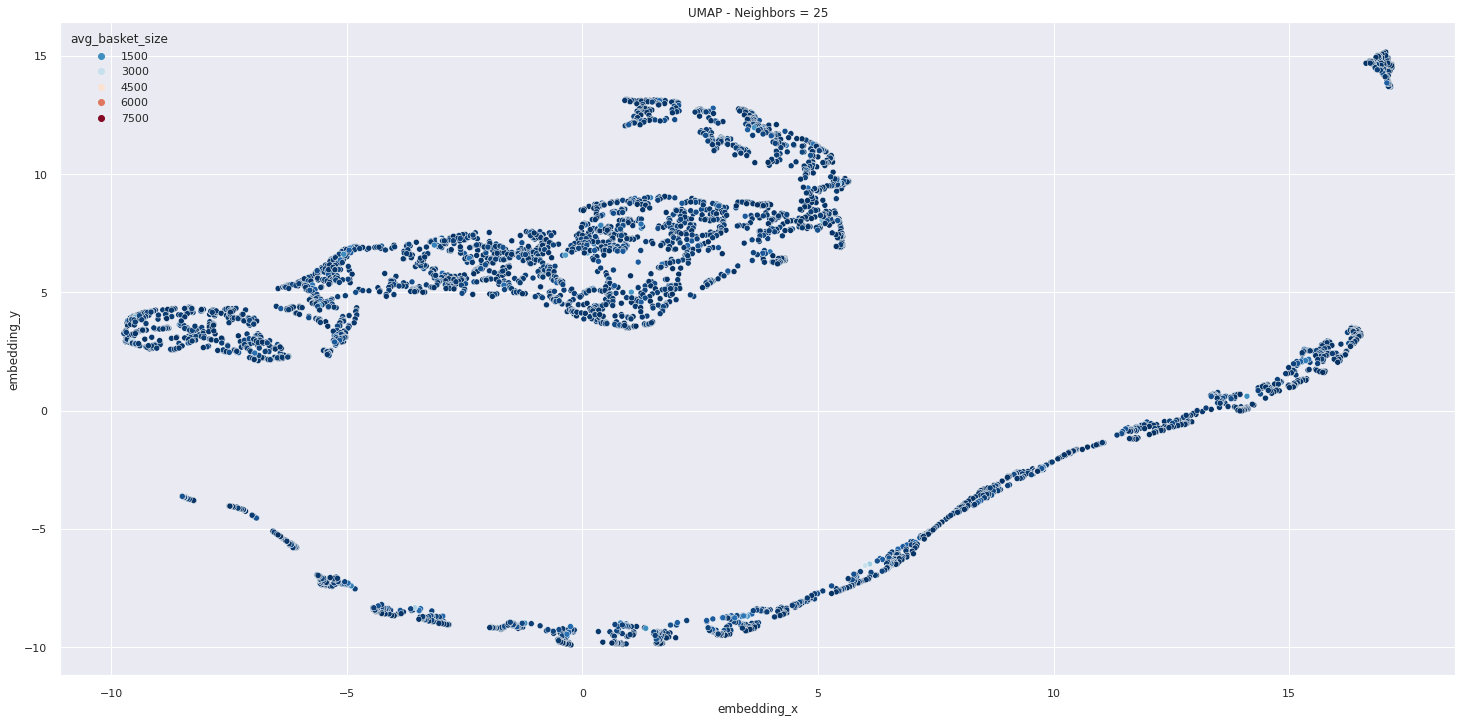

In [ ]:
# Testing UMAP for 25 neighbors
n_neighbors = 25
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_proper)

df_viz = df4.copy()
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'avg_basket_size' );

#### Quick Test UMAP MinMax

Lets see if Log Tranform + StdScaler oculd help us separeta some features

In [ ]:
# selecting numerical cols
# numerical_cols = df4.select_dtypes(include = ['int', 'float'] ).columns.tolist()
# numerical_cols.remove('customer_id')

numerical_cols = ['recency','avg_days_bw_purchases'] + ['num_purchases','date_range','frequency','revenue', 'qty_items', 'avg_ticket','avg_basket_size','avg_unique_prods','returns_revenue','avg_return_revenue','num_returns','qty_returned']
# applying min max transform
ct = make_column_transformer( (MinMaxScaler(), numerical_cols) )
df_prep = ct.fit_transform(df4)

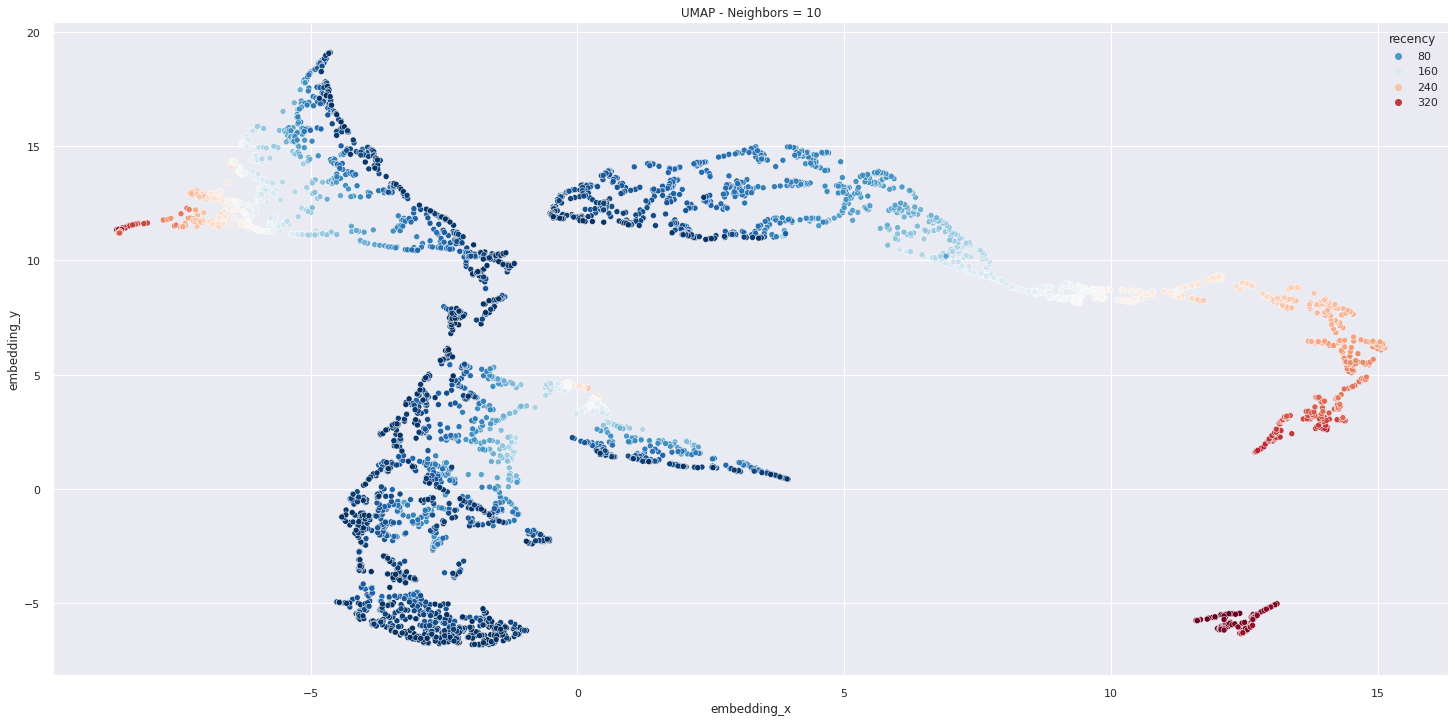

In [ ]:
# Testing UMAP for 5, 15 and 25 neighbors
n_neighbors = 10
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_prep)

df_viz = df4.copy()
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'recency' );

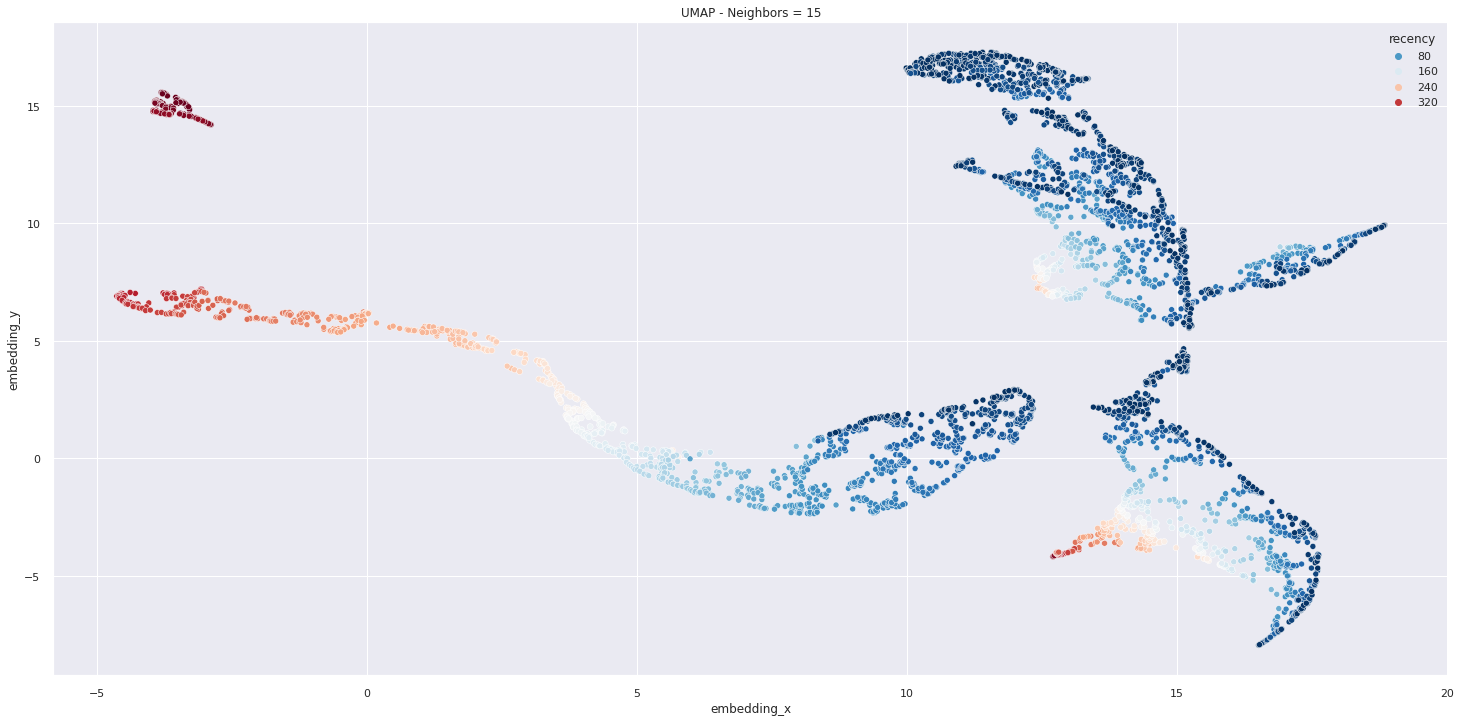

In [ ]:
# Testing UMAP for 5, 15 and 25 neighbors
n_neighbors = 15
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_prep)

df_viz = df4.copy()
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'recency' );

Log Tranform + StdScaler did help separate recency and avg_days_between_purchases

### 4.4.4 TSNE

TSNE is a tool to visualize high-dimensional data using feature extraction.With it, observations that are similar could be closer and may become cluster

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate= 'auto', random_state = 42, init = 'pca')

df_tsne = pd.DataFrame( tsne.fit_transform(df_proper) )

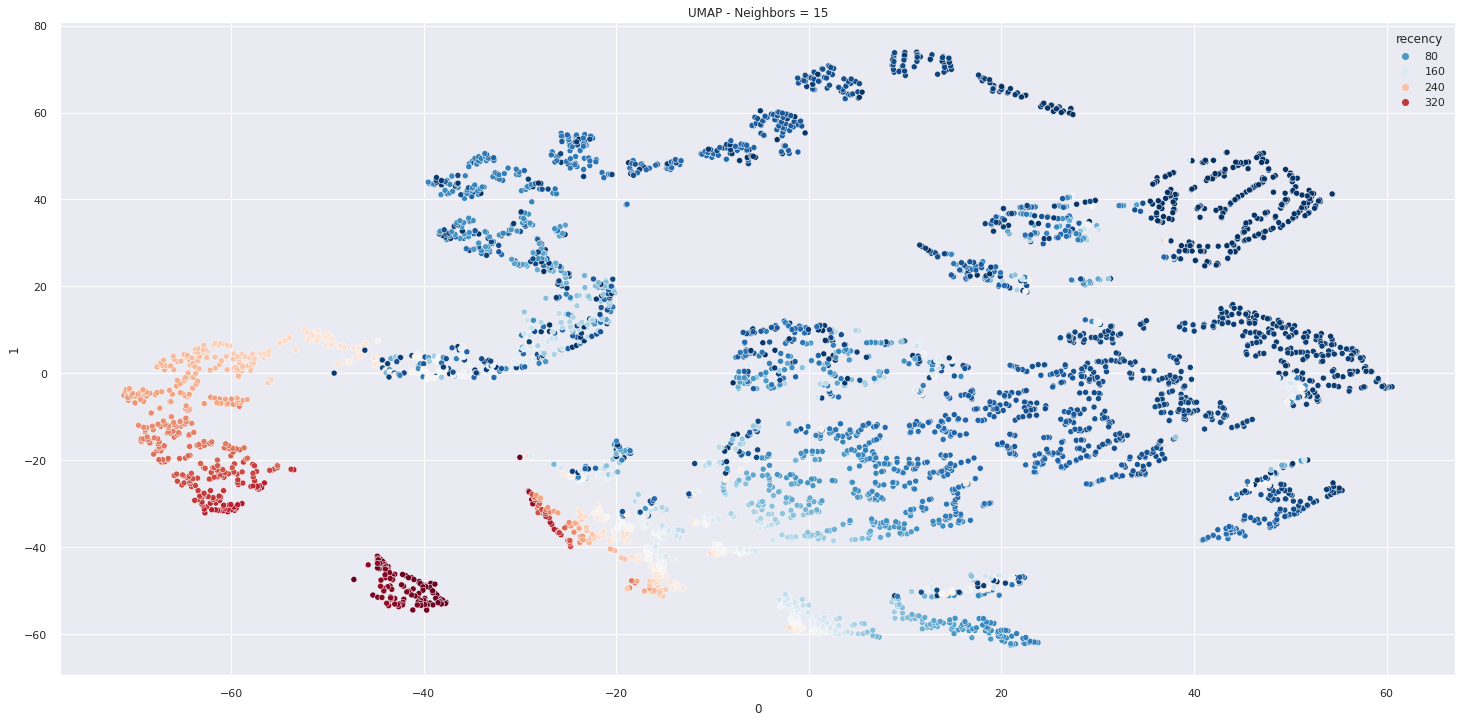

In [ ]:
df_viz = df4.copy()
df_viz = pd.concat( [df_viz, df_tsne], axis = 1 )

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 0, y = 1, palette = cmap, hue = 'recency' );

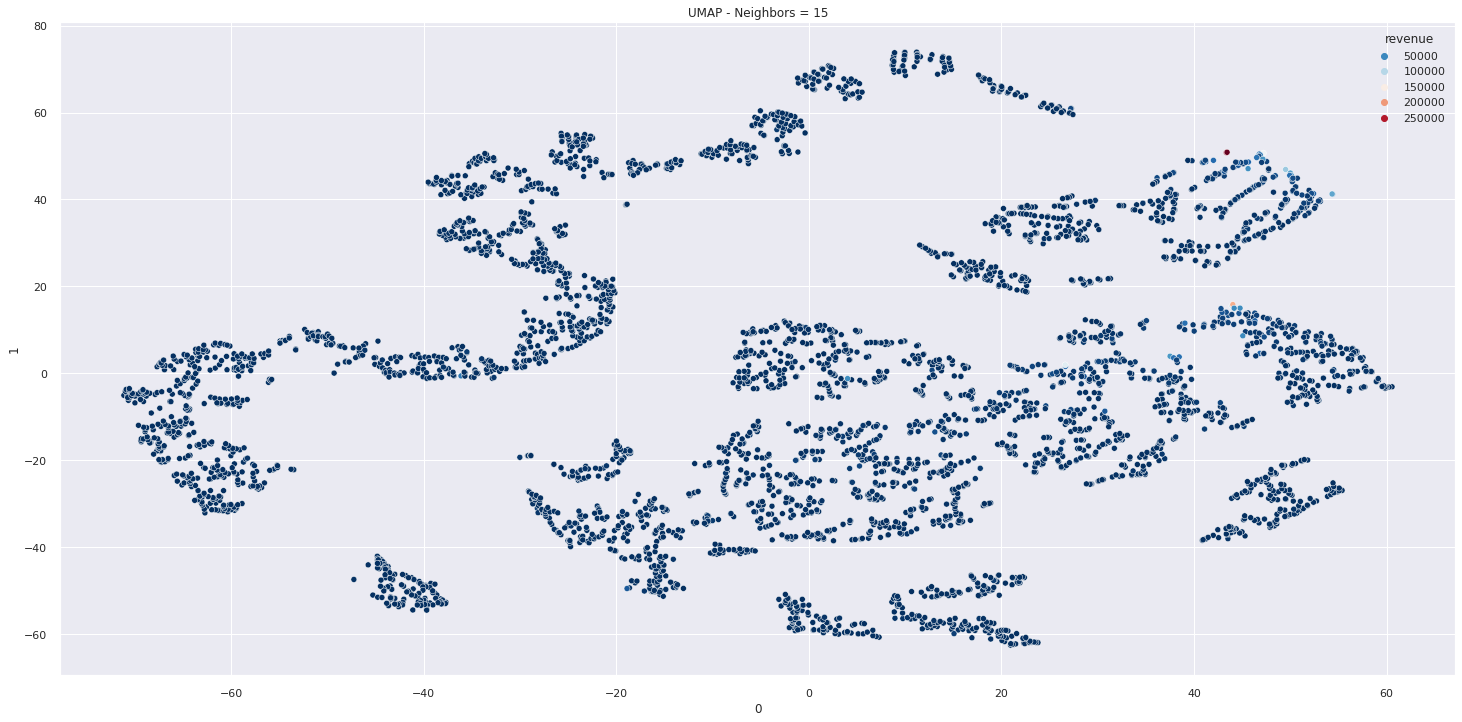

In [ ]:
df_viz = df4.copy()
df_viz = pd.concat( [df_viz, df_tsne], axis = 1 )

cmap = sns.color_palette('RdBu_r', as_cmap=True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz, x = 0, y = 1, palette = cmap, hue = 'revenue' );

Like in UMAP we sell good separation concerning recency, but not with respect to revenue

### 4.4.5 Tree Embedding

Let's see now if using some tree-based algorithms we can understand certain patterns in our dataset

#### 4.4.4.1 Random Trees Embedding

In [ ]:
from sklearn.ensemble import RandomTreesEmbedding

In [ ]:
# reducing number of estimators

random_trees = RandomTreesEmbedding(n_estimators = 10, random_state = 42)

X = df4.drop(['country'], axis = 1 ).copy()

df_emb = random_trees.fit_transform(X)

df_emb = pd.DataFrame( df_emb.toarray() )

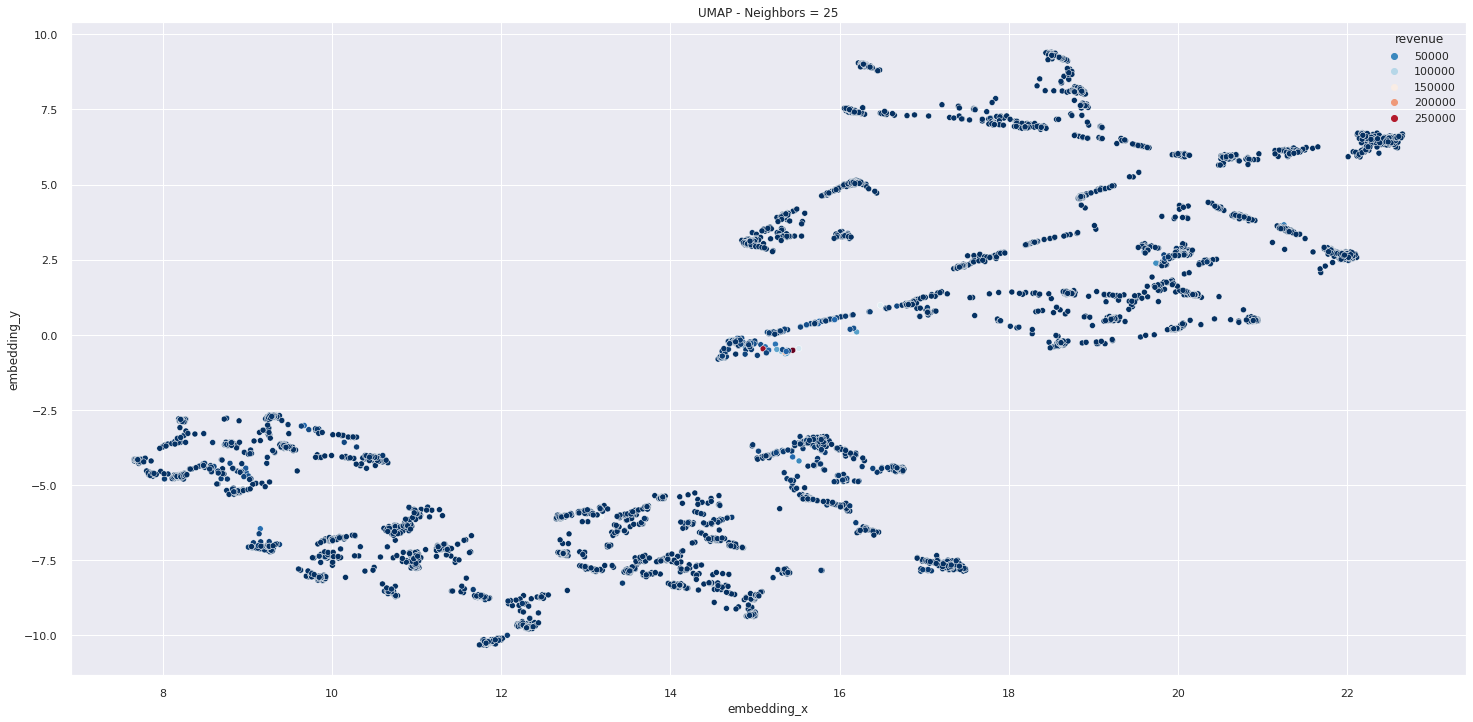

In [ ]:
n_neighbors = 25

reducer = UMAP(n_neighbors=n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_emb)

df_tree = df4.copy()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]

cmap = sns.color_palette( 'RdBu_r', as_cmap= True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'revenue'  );

In [ ]:
# incrasing number of estimators

random_trees = RandomTreesEmbedding(n_estimators = 100, random_state = 42)

X = df4.drop(['country'], axis = 1 ).copy()

df_emb = random_trees.fit_transform(X)

df_emb = pd.DataFrame( df_emb.toarray() )

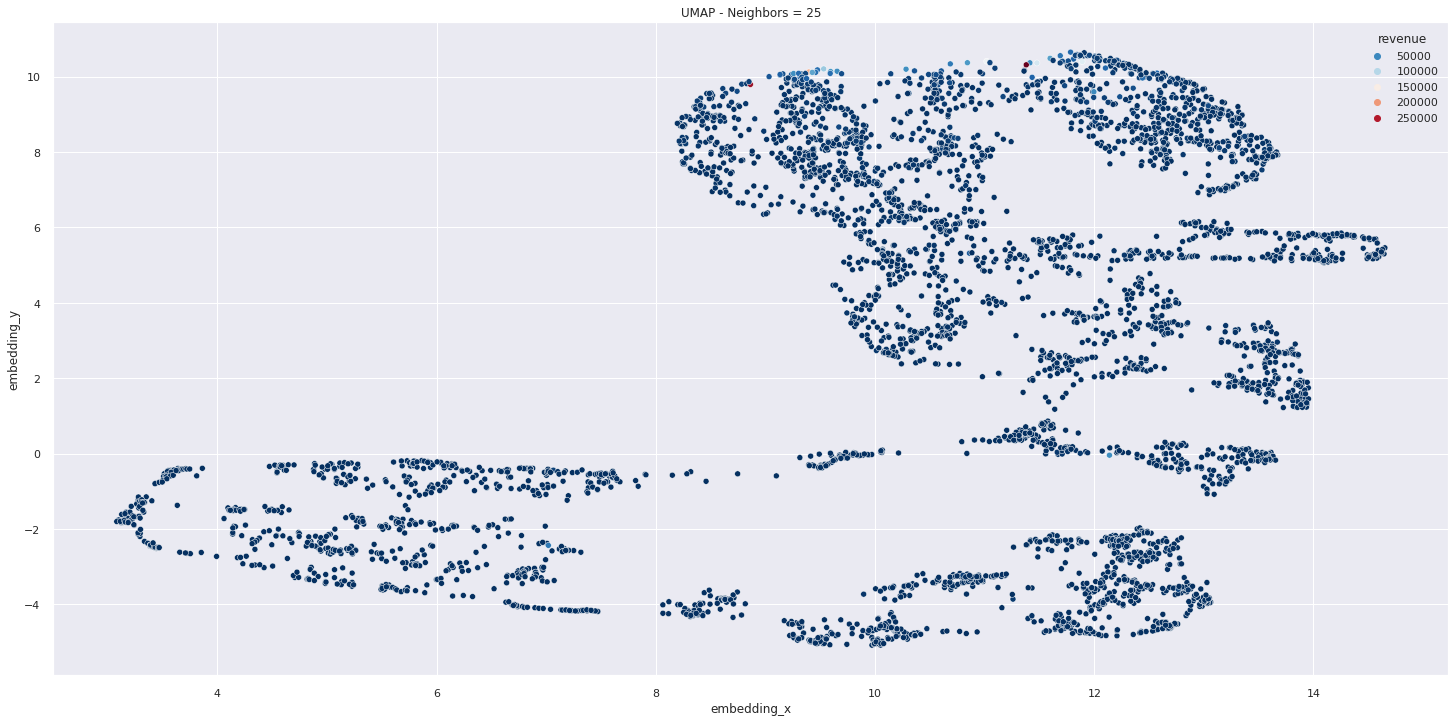

In [ ]:
n_neighbors = 25

reducer = UMAP(n_neighbors=n_neighbors, random_state = 42)
reducer = UMAP(n_neighbors=n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_emb)

df_tree = df4.copy()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]

cmap = sns.color_palette( 'RdBu_r', as_cmap= True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'revenue'  );

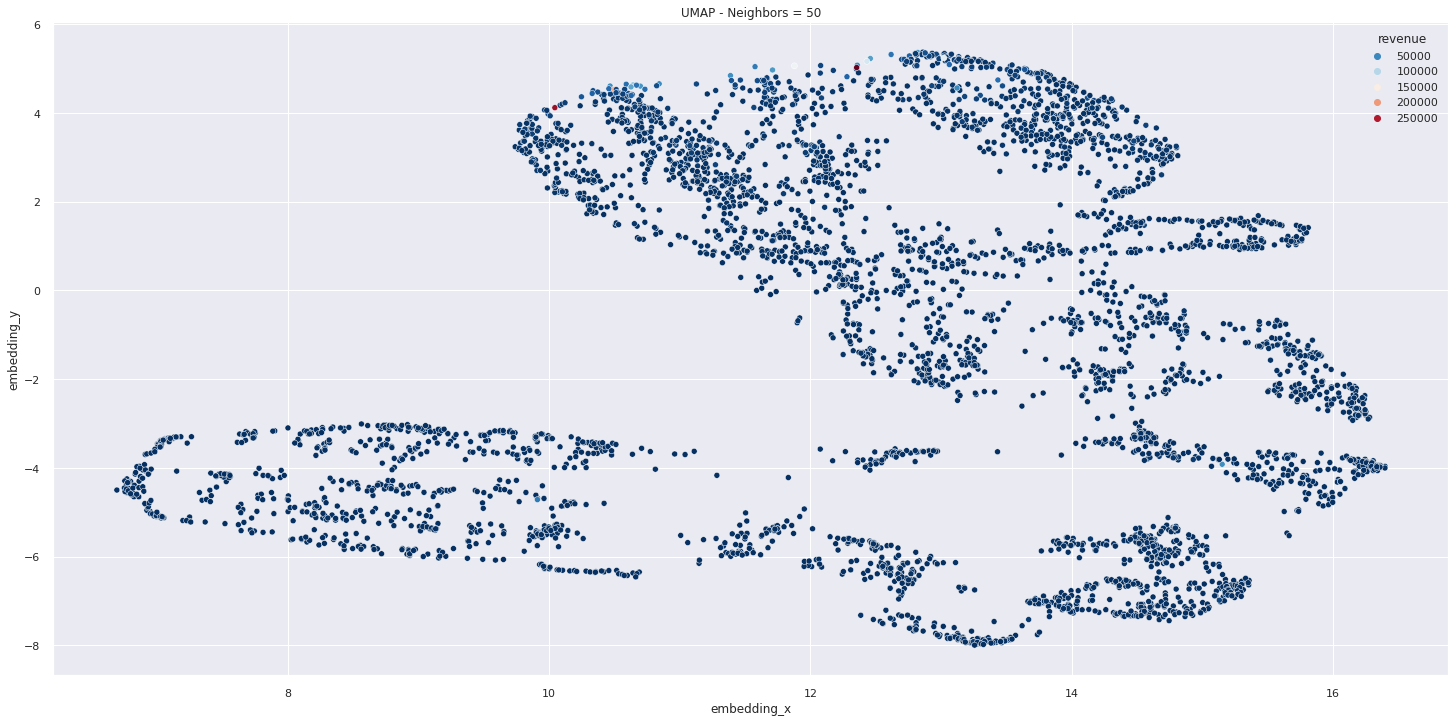

In [ ]:
n_neighbors = 50

reducer = UMAP(n_neighbors=n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_emb)

df_tree = df4.copy()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]

cmap = sns.color_palette( 'RdBu_r', as_cmap= True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'revenue'  );

Not yet... let's keep trying!

#### Using rescaled data

In [ ]:
random_trees = RandomTreesEmbedding(n_estimators = 100, random_state = 42)

tree_embedded = random_trees.fit_transform(df_proper)
tree_embedded = pd.DataFrame(tree_embedded.toarray())

It seems that here we can already see some groups

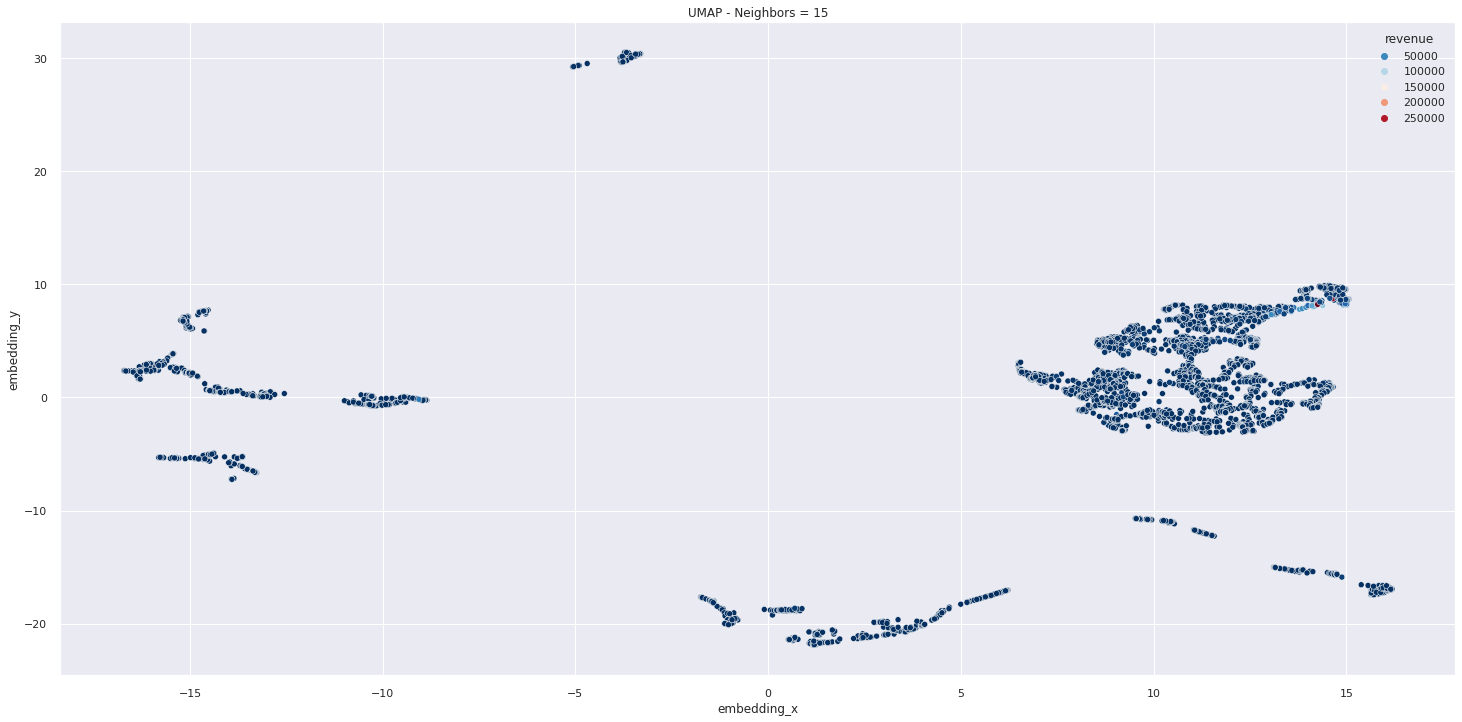

In [ ]:
n_neighbors = 15

reducer = UMAP(n_neighbors=n_neighbors, random_state = 42)
embedding = reducer.fit_transform(tree_embedded)

df_tree = df4.copy()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]

cmap = sns.color_palette( 'RdBu_r', as_cmap= True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'revenue'  ); # hue = 'cluster'

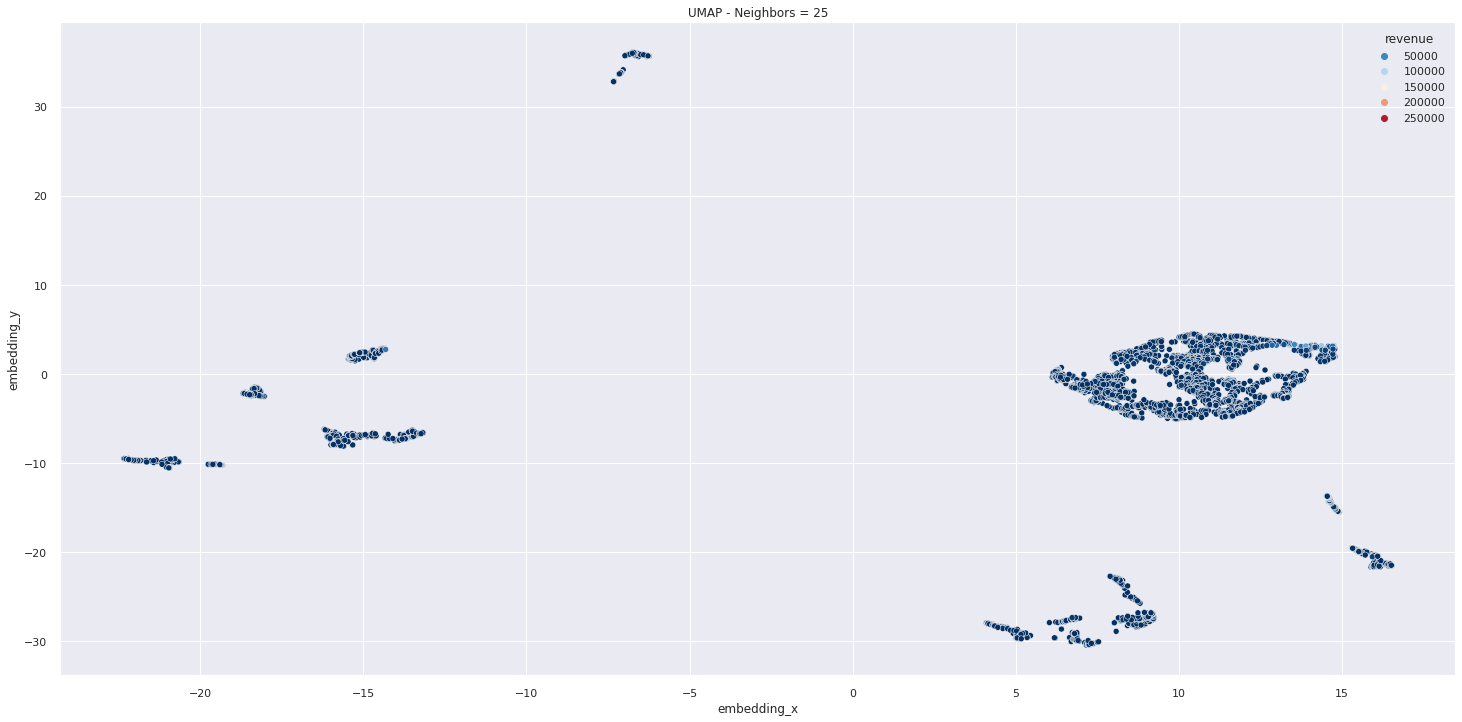

In [ ]:
n_neighbors = 25

reducer = UMAP(n_neighbors=n_neighbors, random_state = 42)
embedding = reducer.fit_transform(tree_embedded)

df_tree = df4.copy()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]

cmap = sns.color_palette( 'RdBu_r', as_cmap= True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', palette = cmap, hue = 'revenue'  ); # hue = 'cluster'

In [ ]:
tree_embedded.shape
df_emb.shape

(4314, 1739)

#### 4.4.4.2 Random Forest Target Embedding

#### Most Features

In [ ]:
df4.head()

customer_id         country  recency  avg_days_bw_purchases  num_purchases  date_range  frequency  revenue  avg_ticket  qty_items  avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  num_returns  qty_returned
0        17850  United Kingdom      373               1.000000             34           1  34.000000  5288.63  155.547941       1693        48.371429          8.735294          -102.58           -6.838667         15.0         -40.0
1        13047  United Kingdom       57              52.833333              9         317   0.028391  3089.10  343.233333       1355        84.687500         19.000000          -143.49           -6.238696         23.0         -35.0
2        12583          France        3              26.500000             15         371   0.040431  6629.34  441.956000       4978       292.823529         15.466667           -76.04          -25.346667          3.0         -50.0
3        13748  United Kingdom       96              92.666667              5         278   0.017986   948.25  189.650000        439        87.800000          5.600000             0.00            0.000000          0.0           0.0
4        15100  United Kingdom      334              20.000000              3          40   0.075000   635.10  211.700000         58         9.666667          1.000000          -240.90          -80.300000          3.0         -22.0

In [ ]:
# defining independent and dependent variable
X = df4.drop( ['customer_id', 'country', 'revenue'], axis = 1 ).copy()
y = df4['revenue']

rf = RandomForestRegressor(n_estimators = 100,  random_state = 42) #min_samples_leaf = 10,
rf.fit(X, y)

# get leafs for each observation
df_leaf = pd.DataFrame(rf.apply(X))

# droping country doesn't work
# increasing n_estimators to 1000 doesn't work
# reducing maxdepth 8

In [ ]:
sorted( list(zip(rf.feature_importances_, rf.feature_names_in_)), reverse = True )

[(0.8820419964913292, 'qty_items'),
 (0.02408347693872147, 'avg_ticket'),
 (0.023692139428931062, 'num_returns'),
 (0.013879928205749972, 'returns_revenue'),
 (0.012695615882153522, 'avg_unique_prods'),
 (0.012038422078960961, 'qty_returned'),
 (0.006698409687289645, 'num_purchases'),
 (0.005324307342855562, 'recency'),
 (0.004930020847481924, 'frequency'),
 (0.004851673609335329, 'avg_return_revenue'),
 (0.004180456634495663, 'avg_basket_size'),
 (0.0029654413458839236, 'avg_days_bw_purchases'),
 (0.0026181115068117287, 'date_range')]

In [ ]:
df_leaf.head()

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99
0  4592  4796  4798  4810  4900  4819  4630  4586  4777  5028  5024  4457  4820  4963  4792  4877  4717  4938  4567  4841  4828  4790  4914  4804  4400  4923  4437  4966  4797  4438  4349  5008  5039  4990  4591  4803  4835  5087  4943  4768  4755  4813  4240  4934  4951  4753  4846  4968  4733  4489  4888  4851  4716  4703  4789  5005  4738  4882  4961  4660  4957  5007  4764  4801  5109  4964  4939  4550  4961  4989  4469  4736  4831  4751  4962  4627  4574  4752  4764  5008  4456  4723  4953  4825  4996  4985  4394  4806  4683  4664  4786  4968  4707  4595  5088  4754  4363  4869  4747  5015
1  4656  4844  4530  4827  3982  4884  4377  4684  4821  4643  4632  4506  4259  4583  4750  4273  4687  4283  4680  4614  4450  4733  4382  4875  4433  4440  4382  4536  4686  4389  4458  4634  3910  4618  4150  4586  4513  4687  4544  4493  4566  4486  4761  4250  4681  4555  4763  3929  4780  4441  4575  4762  4612  4774  4774  4977  4173  4607  4514  4795  4471  4654  4138  4743  4367  4560  4209  4264  4598  4598  4758  4763  4427  4722  4564  4596  4363  4833  4391  4529  4490  4677  4585  4775  4502  4503  4652  4828  4669  4630  4774  4857  4165  4582  4540  4724  4428  4395  4654  4438
2  5105  5292  5150  5318  5259  5302  5143  5174  5259  5155  5222  5241  5180  5274  5217  5132  5179  5144  5149  5297  5082  5147  5069  5250  5285  5235  5224  5241  5168  5200  5307  5382  5146  5117  5131  5206  5250  5363  5109  5240  5071  5214  5225  5267  5341  5194  5264  5114  5181  5271  5375  5305  5222  5090  5177  5374  5270  4992  5226  5257  5271  5109  5254  5281  5238  5206  5229  5108  5019  5162  5205  5228  5177  5175  5092  5180  5223  5275  5289  5097  5171  5245  5280  5278  5254  5052  5178  5274  5173  5099  5297  5309  5226  5229  5232  5247  5294  5171  5252  5238
3  2741  3892  3614  3430  3357  2976  3353  3025  3523  3309  3268  3450  3390  3362  3372  3326  3346  3522  3038  2777  3536  3496  3325  3430  3515  3641  2663  3727  2553  3154  3569  2969  3674  3666  2859  3489  3766  3394  3264  3367  3612  3506  3421  3339  3504  3445  3103  3690  2848  3552  3471  3801  3345  3232  3320  2781  2777  2919  3496  3693  3706  3770  2760  3531  3264  3118  3403  3425  3241  2730  3591  3384  3607  3507  3718  2824  3564  3374  3432  3389  3683  3393  3578  2838  3415  3284  3441  3293  3350  3281  3151  2818  3160  3192  3312  3027  3375  3665  3664  3709
4  1466  1799  1395  1165  1061  1259  1099  1243  1171   712  1189  1150  1256  1146  1093  1023  1183  1174   742   741  1120   936  1314  1200  1082  1168  1440  1258  1883  1192  1220  1242  1143  1194  1909  1202  1218  1488  1182  1235  1233  1097  1386  1224  1164  1002  2096  1191  1133  1234  1172  1195  1208  1127  1197   822  1782  1928  1052  1053  1163  1260  1202  1219  2141  1505   768   896  1468   634   934  1170  1101  1157  1134  1964  1167  1264  1174  1118  1597  1512  1122   914  1111  1677  1153  1210  1078  1128  1053   707  1183  1234   993  1484  1118  1123  1197  1206

In [ ]:
# df_tree.sort_values('num_purchases', ascending = False).head(10)

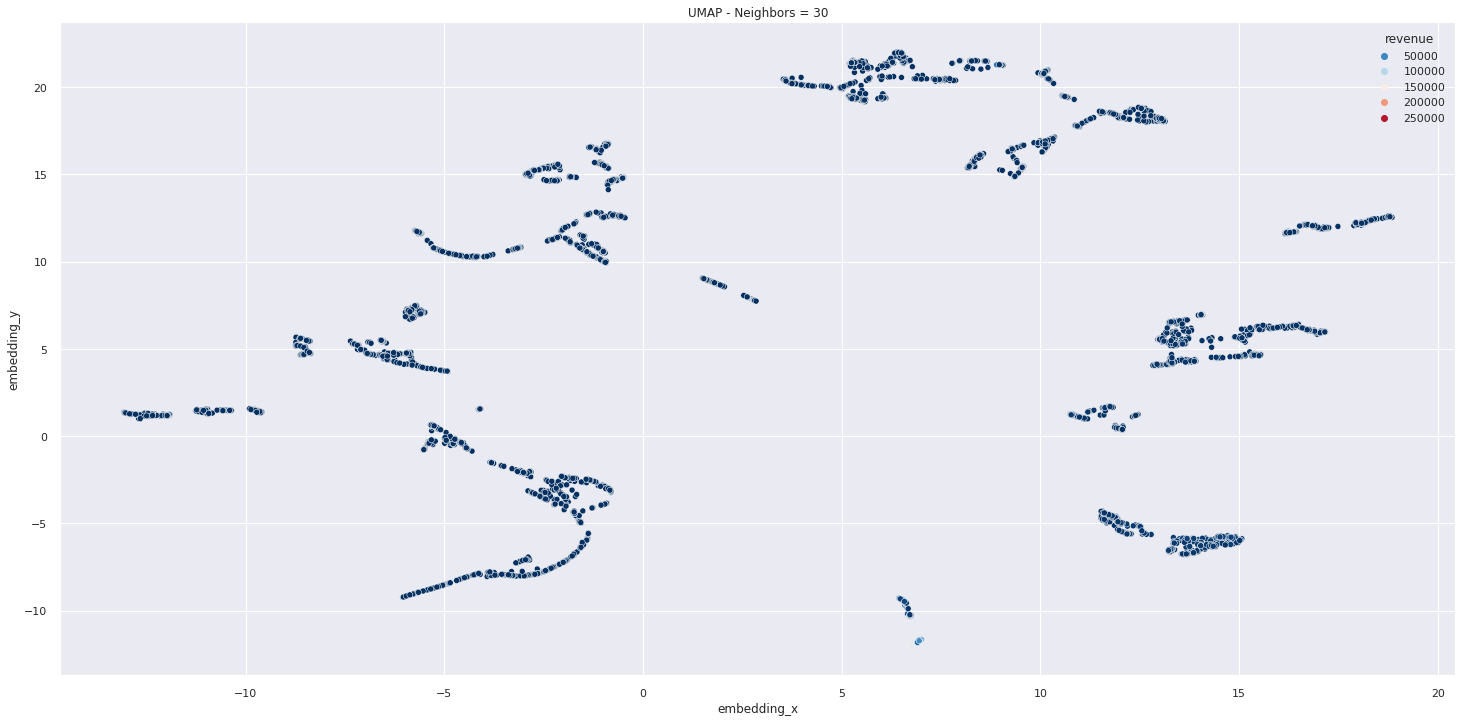

In [ ]:
n_neighbors = 30
umap = UMAP(n_neighbors = n_neighbors, random_state = 42) 
res_umap = umap.fit_transform(df_leaf)

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);


/home/humberto/.pyenv/versions/3.8.0/envs/insiders/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


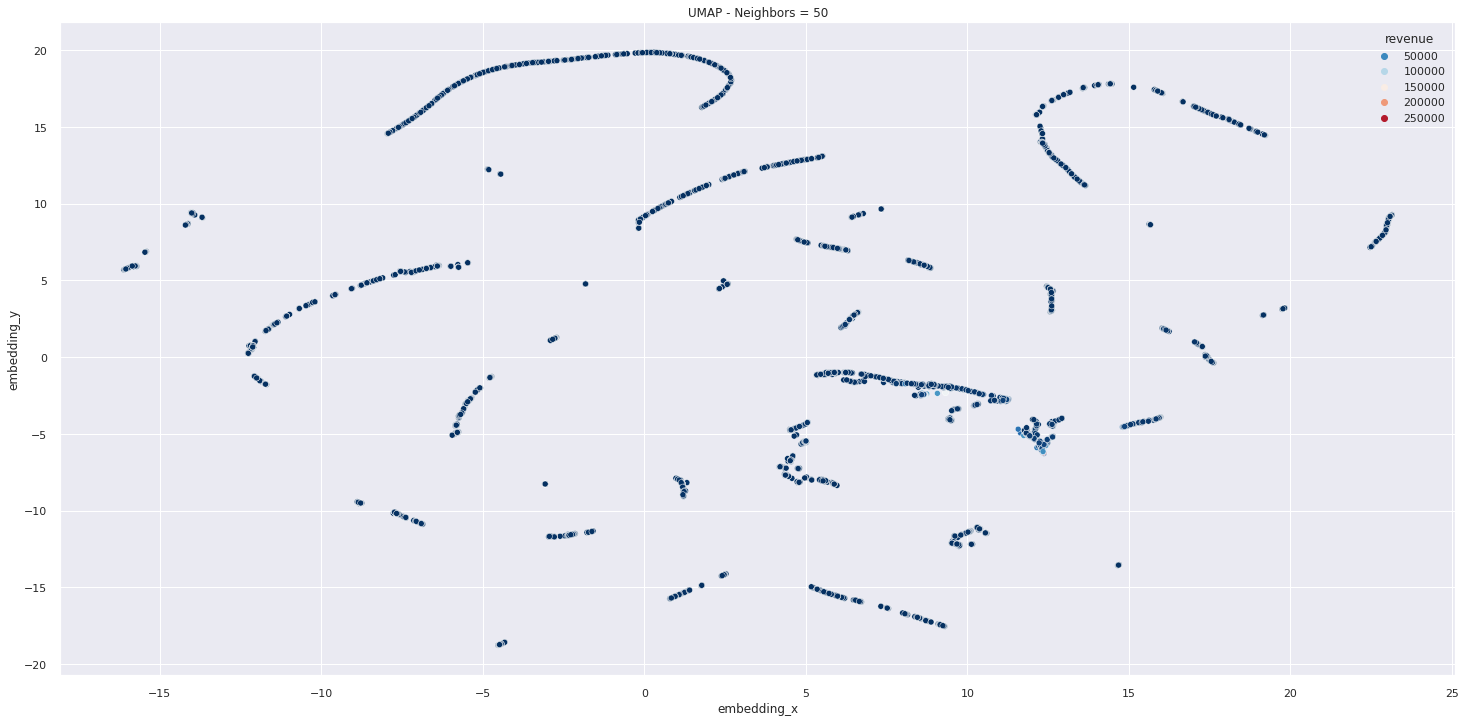

In [ ]:
n_neighbors = 50
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42) 
res_umap = reducer.fit_transform(df_leaf)

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

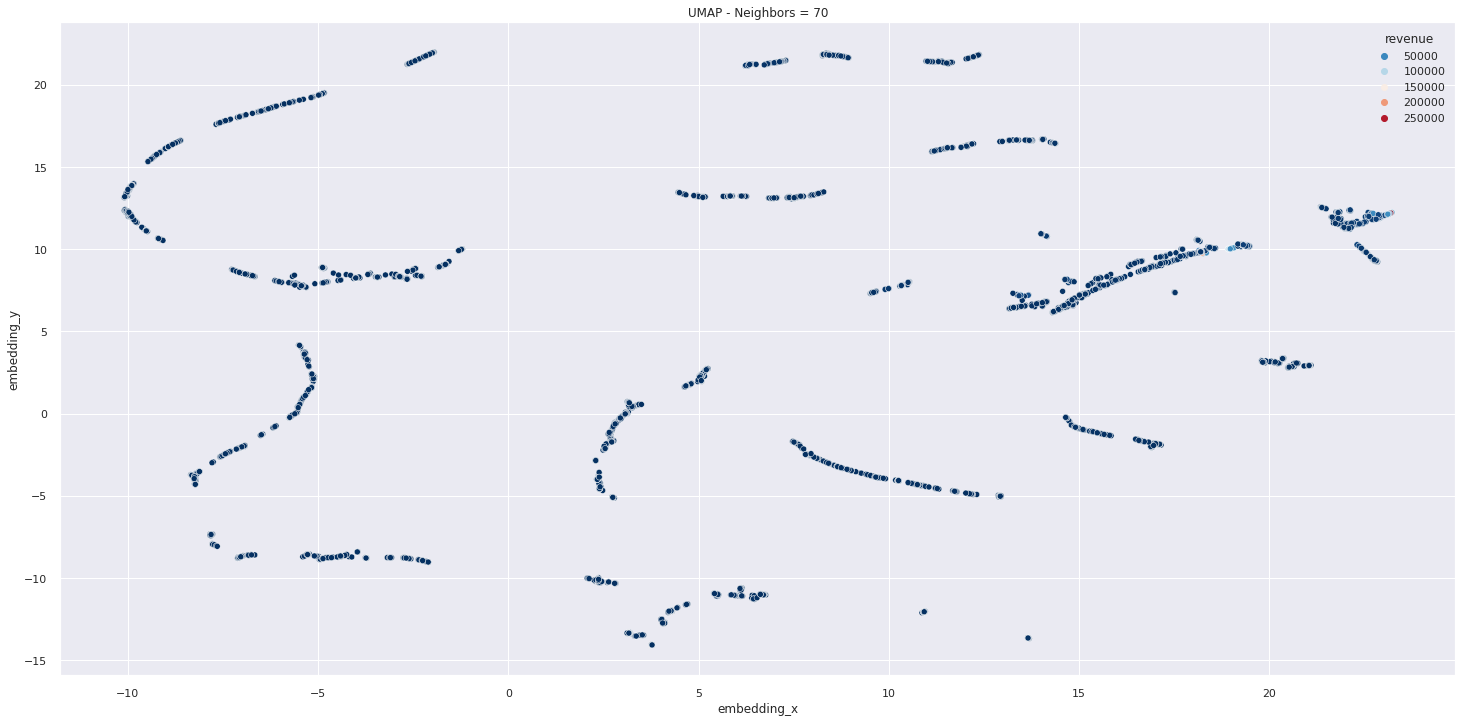

In [ ]:
n_neighbors = 70
umap = UMAP(n_neighbors = n_neighbors, random_state = 42) 
res_umap = umap.fit_transform(df_leaf)

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);


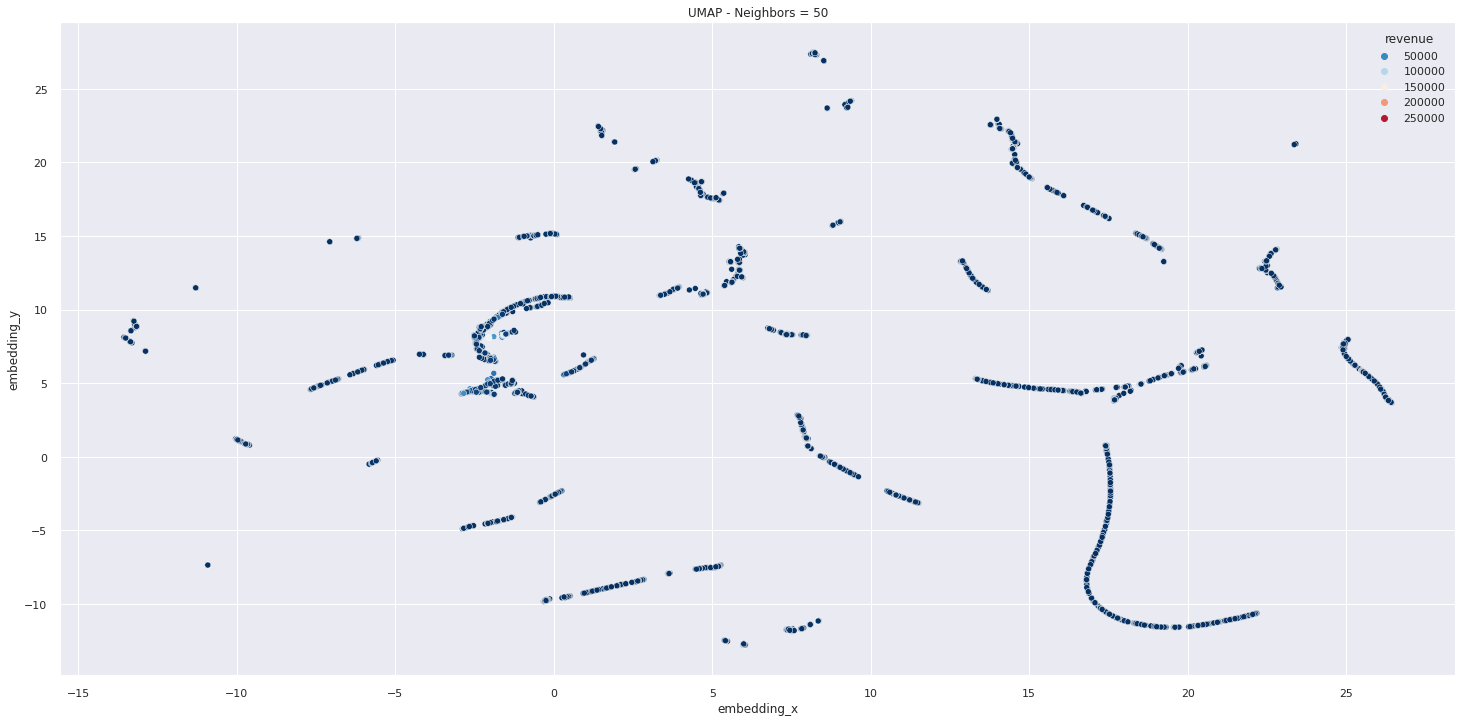

In [ ]:
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'euclidean') 
res_umap = umap.fit_transform(leaf)

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);


In [ ]:
# recency_days	qtde_invoices	qtde_items	qtde_products	avg_ticket	avg_recency_days	frequency	qtde_returns	avg_basket_size	avg_unique_basket_size

# max leafs +- 3800

#### Less Features

Testing tree embedding with less features and other distance metrics

In [ ]:
cols_selected = ['qty_items','avg_ticket','num_returns','returns_revenue','avg_unique_prods','qty_returned','num_purchases','recency','frequency']# defining independent and dependent variable

X = df4[cols_selected].copy()
y = df4['revenue']

rf = RandomForestRegressor(random_state = 42) #, min_samples_split = 20
rf.fit(X, y)

# get leafs for each observation
df_leaf = pd.DataFrame( rf.apply(X) )

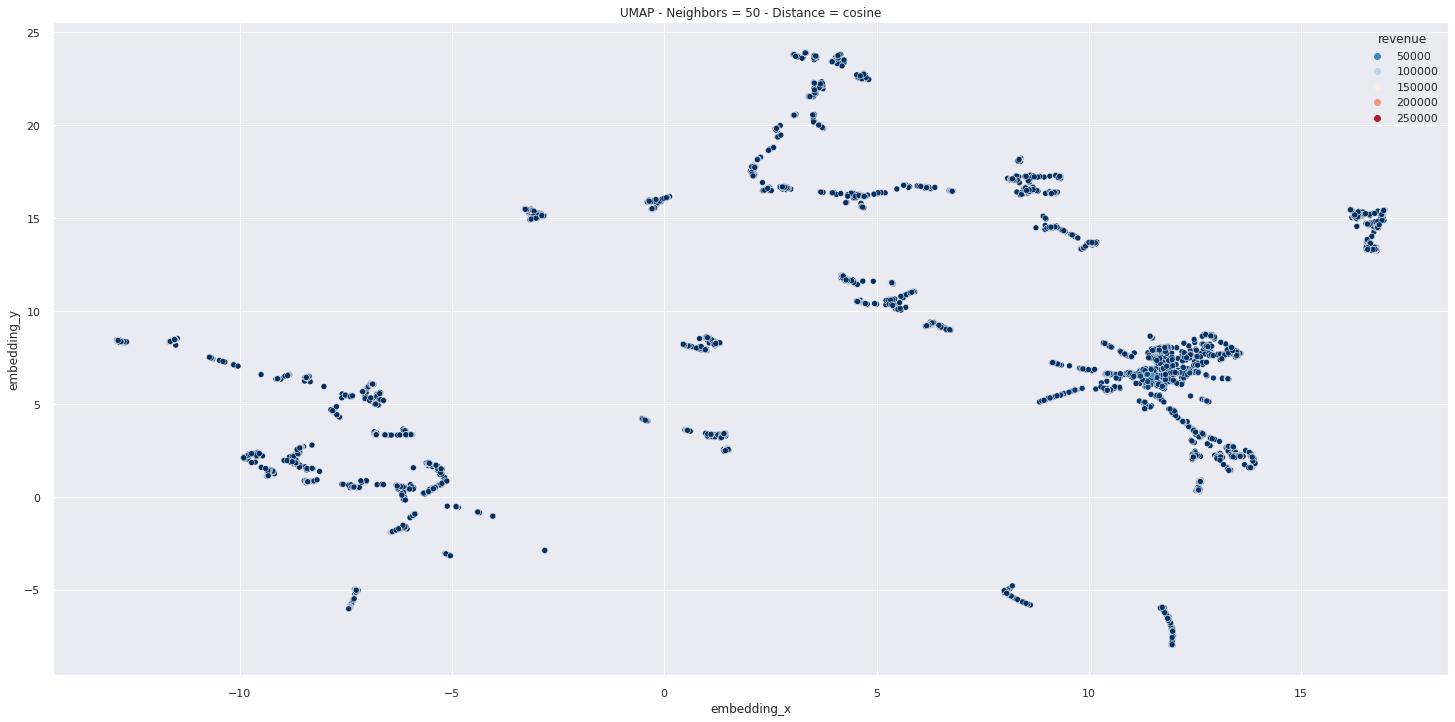

In [ ]:
# Cosine Distance 
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'cosine')  # mahalanobis n funcionou
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

In [ ]:
df_tree.sort_values('revenue', ascending = False).head(10)

customer_id         country  recency  avg_days_bw_purchases  num_purchases  date_range  frequency    revenue   avg_ticket  qty_items  avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  num_returns  qty_returned  embedding_x  embedding_y
844        14646     Netherlands        2               8.022727             73         353   0.206799  278778.02  3818.876986     197132      2663.945946         28.273973          -360.00         -180.000000          2.0        -288.0    11.502449     6.615453
419        18102  United Kingdom        1              14.680000             60         367   0.163488  259657.30  4327.621667      64124      1068.733333          7.183333             0.00            0.000000          0.0           0.0    11.540702     6.710783
372        17450  United Kingdom        9              13.807692             46         359   0.128134  189735.53  4124.685435      69041      1409.000000          7.304348         -4815.26        -1605.086667          3.0        -952.0    11.569393     6.699728
65         14911            EIRE        2               2.861538            199         372   0.534946  133007.13   668.377538      77181       317.617284         28.492462         -7443.59          -33.379327        223.0       -3332.0    11.522726     6.661098
912        12415       Australia       25              22.357143             20         313   0.063898  123638.18  6181.909000      77242      3218.416667         35.750000          -926.35          -15.186066         61.0        -427.0    11.591179     6.674881
199        14156            EIRE       10               8.619048             55         362   0.151934  114505.32  2081.914909      57026       877.323077         25.327273         -2874.31         -151.279474         19.0        -859.0    11.320277     6.731628
15         17511  United Kingdom        3              13.740741             31         371   0.083558   88138.20  2843.167742      63014      1400.311111         31.064516         -2924.18          -26.343964        111.0       -1535.0    11.398486     6.597251
800        16684  United Kingdom        5              23.600000             28         354   0.079096   65920.12  2354.290000      49391      1646.366667          9.892857          -733.44         -244.480000          3.0        -864.0    11.411681     6.603209
35         13694  United Kingdom        4              10.882353             50         370   0.135135   62924.10  1258.482000      61808      1084.350877         11.360000         -2115.52         -151.108571         14.0       -1504.0    11.511019     6.589230
8          15311  United Kingdom        1               4.191011             91         373   0.243968   59419.34   652.959780      37720       319.661017         25.901099         -1348.56          -12.040714        112.0        -474.0    11.650355     6.726884

In [ ]:
# df_tree.sort_values('embedding_x', ascending = True).head(10)

/home/humberto/.pyenv/versions/3.8.0/envs/insiders/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


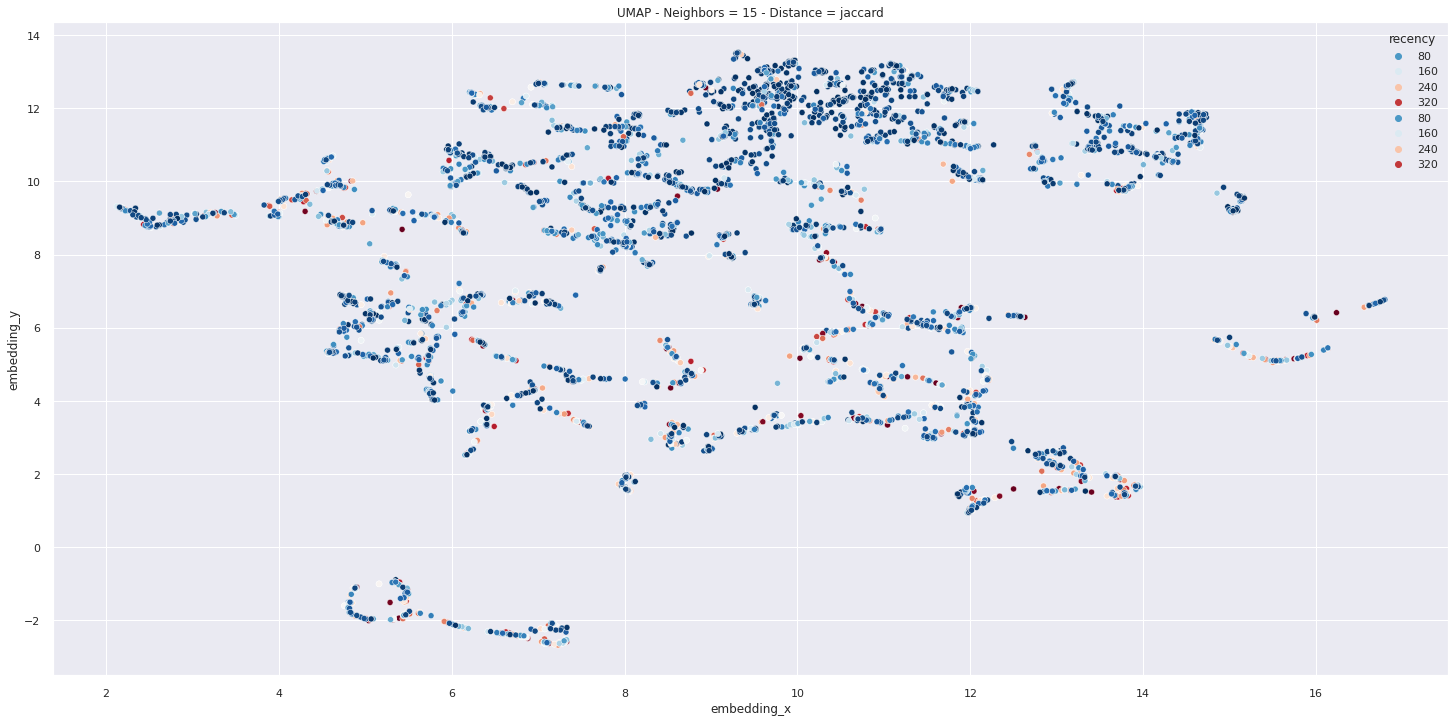

In [ ]:
# Jaccard Distance

n_neighbors = 15
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'jaccard')  # mahalanobis didnt work
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'recency', palette = cmap);

In [ ]:
df_tree.sort_values('revenue', ascending = False).head(10)

customer_id         country  recency  avg_days_bw_purchases  num_purchases  date_range  frequency    revenue   avg_ticket  qty_items  avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  num_returns  qty_returned  embedding_x  embedding_y
844        14646     Netherlands        2               8.022727             73         353   0.206799  278778.02  3818.876986     197132      2663.945946         28.273973          -360.00         -180.000000          2.0        -288.0     9.901376    13.257434
419        18102  United Kingdom        1              14.680000             60         367   0.163488  259657.30  4327.621667      64124      1068.733333          7.183333             0.00            0.000000          0.0           0.0     9.969779    13.313319
372        17450  United Kingdom        9              13.807692             46         359   0.128134  189735.53  4124.685435      69041      1409.000000          7.304348         -4815.26        -1605.086667          3.0        -952.0     9.896110    13.278388
65         14911            EIRE        2               2.861538            199         372   0.534946  133007.13   668.377538      77181       317.617284         28.492462         -7443.59          -33.379327        223.0       -3332.0     9.957540    13.315072
912        12415       Australia       25              22.357143             20         313   0.063898  123638.18  6181.909000      77242      3218.416667         35.750000          -926.35          -15.186066         61.0        -427.0     9.902721    13.246406
199        14156            EIRE       10               8.619048             55         362   0.151934  114505.32  2081.914909      57026       877.323077         25.327273         -2874.31         -151.279474         19.0        -859.0     9.912790    13.258581
15         17511  United Kingdom        3              13.740741             31         371   0.083558   88138.20  2843.167742      63014      1400.311111         31.064516         -2924.18          -26.343964        111.0       -1535.0     9.968837    13.297587
800        16684  United Kingdom        5              23.600000             28         354   0.079096   65920.12  2354.290000      49391      1646.366667          9.892857          -733.44         -244.480000          3.0        -864.0     9.873857    12.971510
35         13694  United Kingdom        4              10.882353             50         370   0.135135   62924.10  1258.482000      61808      1084.350877         11.360000         -2115.52         -151.108571         14.0       -1504.0     9.944322    13.268776
8          15311  United Kingdom        1               4.191011             91         373   0.243968   59419.34   652.959780      37720       319.661017         25.901099         -1348.56          -12.040714        112.0        -474.0     9.948548    13.297806

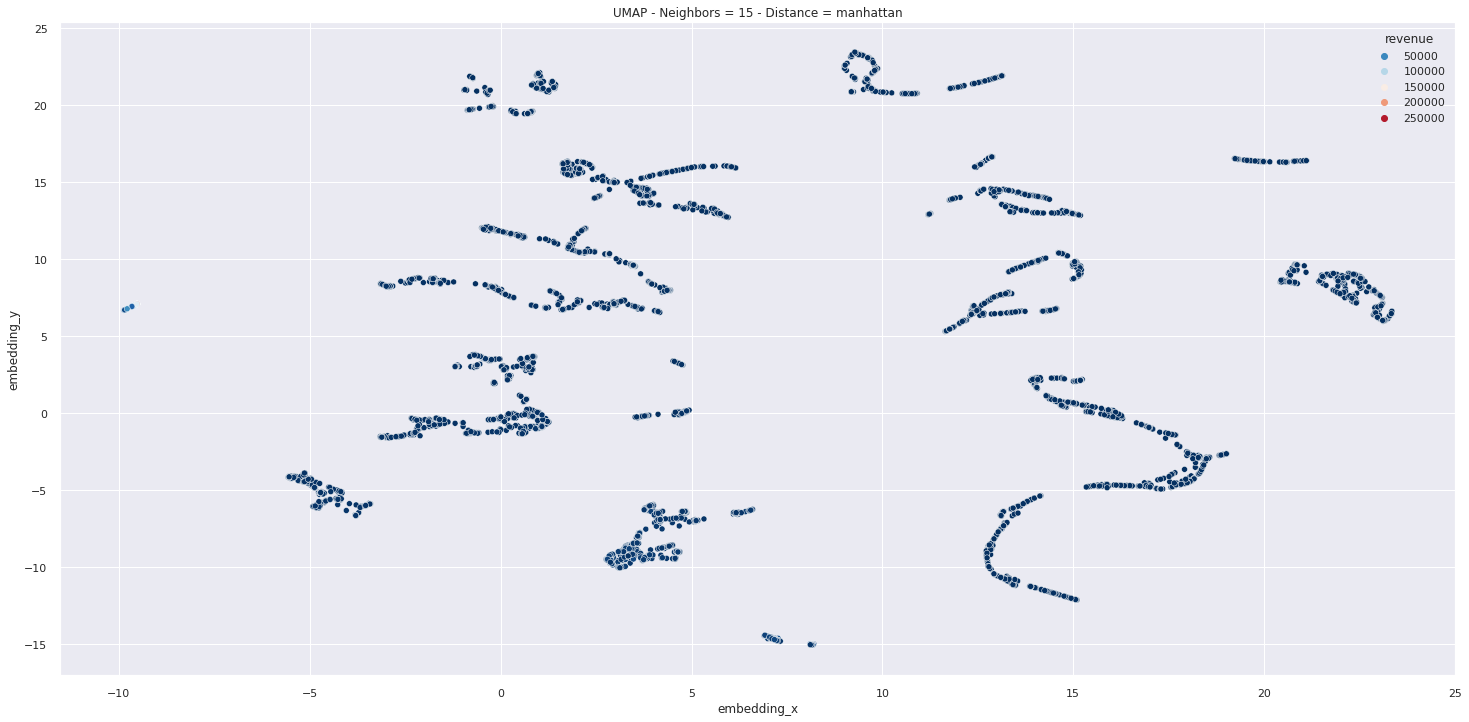

In [ ]:
# Manhattan Distance

n_neighbors = 15
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan') # mahalanobis didnt work
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

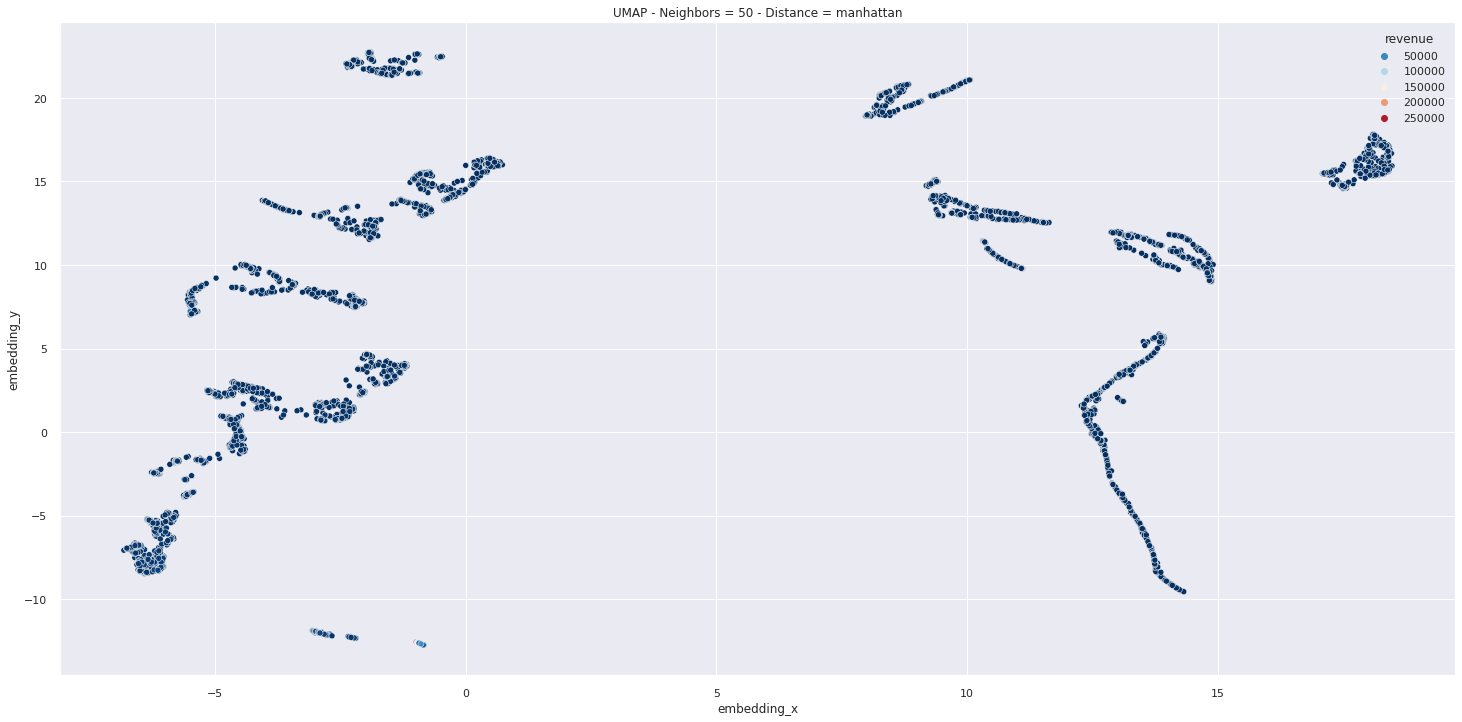

In [ ]:
# Manhattan Distance

n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  # mahalanobis n funcionou
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

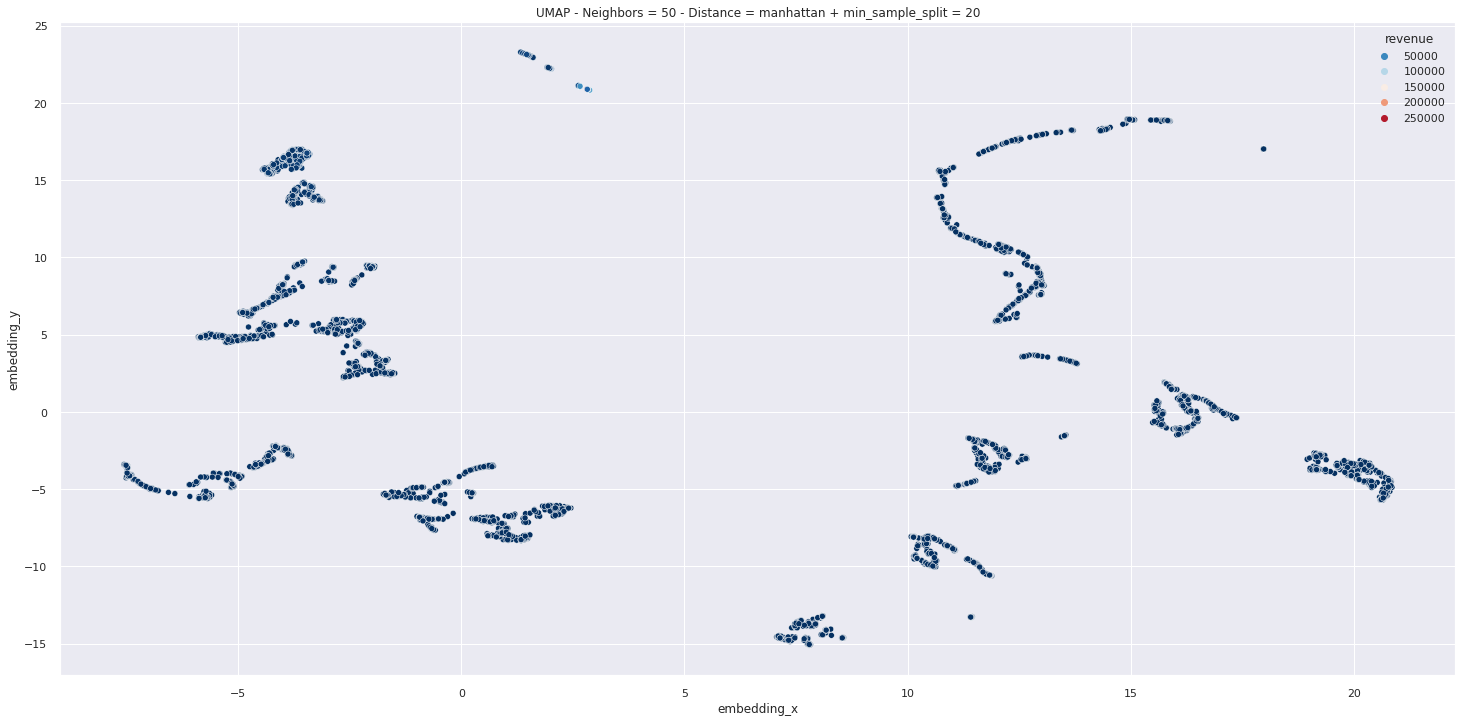

In [ ]:
cols_selected = ['qty_items','avg_ticket','num_returns','returns_revenue','avg_unique_prods','qty_returned','num_purchases','recency','frequency']# defining independent and dependent variable

X = df4[cols_selected].copy()
y = df4['revenue']

rf = RandomForestRegressor(random_state = 42, min_samples_split = 20) 
rf.fit(X, y)

# get leafs for each observation
df_leaf = pd.DataFrame( rf.apply(X) )


# Manhattan Distance
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42, metric = 'manhattan')  # mahalanobis n funcionou
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {} + min_sample_split = 20'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);

In [ ]:
df_tree.sort_values('revenue', ascending = False).head(10)

customer_id         country  recency  avg_days_bw_purchases  num_purchases  date_range  frequency    revenue   avg_ticket  qty_items  avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  num_returns  qty_returned  embedding_x  embedding_y
844        14646     Netherlands        2               8.022727             73         353   0.206799  278778.02  3818.876986     197132      2663.945946         28.273973          -360.00         -180.000000          2.0        -288.0    -9.527265     7.069028
419        18102  United Kingdom        1              14.680000             60         367   0.163488  259657.30  4327.621667      64124      1068.733333          7.183333             0.00            0.000000          0.0           0.0    -9.527138     7.068988
372        17450  United Kingdom        9              13.807692             46         359   0.128134  189735.53  4124.685435      69041      1409.000000          7.304348         -4815.26        -1605.086667          3.0        -952.0    -9.527414     7.068754
65         14911            EIRE        2               2.861538            199         372   0.534946  133007.13   668.377538      77181       317.617284         28.492462         -7443.59          -33.379327        223.0       -3332.0    -9.523754     7.073137
912        12415       Australia       25              22.357143             20         313   0.063898  123638.18  6181.909000      77242      3218.416667         35.750000          -926.35          -15.186066         61.0        -427.0    -9.533222     7.063769
199        14156            EIRE       10               8.619048             55         362   0.151934  114505.32  2081.914909      57026       877.323077         25.327273         -2874.31         -151.279474         19.0        -859.0    -9.541841     7.051040
15         17511  United Kingdom        3              13.740741             31         371   0.083558   88138.20  2843.167742      63014      1400.311111         31.064516         -2924.18          -26.343964        111.0       -1535.0    -9.520920     7.074093
800        16684  United Kingdom        5              23.600000             28         354   0.079096   65920.12  2354.290000      49391      1646.366667          9.892857          -733.44         -244.480000          3.0        -864.0    -9.549254     7.042093
35         13694  United Kingdom        4              10.882353             50         370   0.135135   62924.10  1258.482000      61808      1084.350877         11.360000         -2115.52         -151.108571         14.0       -1504.0    -9.534281     7.059819
8          15311  United Kingdom        1               4.191011             91         373   0.243968   59419.34   652.959780      37720       319.661017         25.901099         -1348.56          -12.040714        112.0        -474.0    -9.577688     7.007822

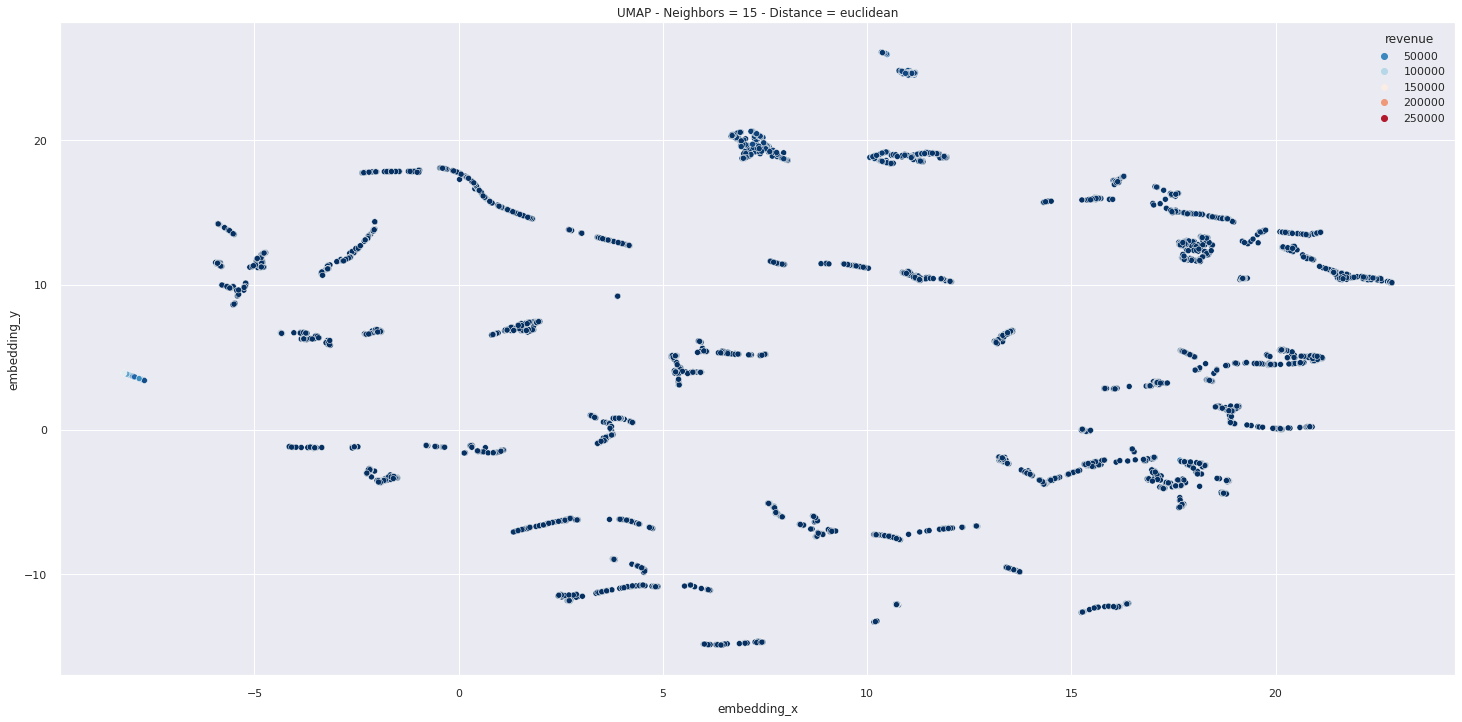

In [ ]:
# Euclidean distance
n_neighbors = 15
umap = UMAP(n_neighbors = n_neighbors, random_state = 42) 
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric 

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);


In [ ]:
df_tree.sort_values('revenue', ascending = False).head(10)

customer_id         country  recency  avg_days_bw_purchases  num_purchases  date_range  frequency    revenue   avg_ticket  qty_items  avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  num_returns  qty_returned  embedding_x  embedding_y
844        14646     Netherlands        2               8.022727             73         353   0.206799  278778.02  3818.876986     197132      2663.945946         28.273973          -360.00         -180.000000          2.0        -288.0    -8.196600     3.903471
419        18102  United Kingdom        1              14.680000             60         367   0.163488  259657.30  4327.621667      64124      1068.733333          7.183333             0.00            0.000000          0.0           0.0    -8.193848     3.900485
372        17450  United Kingdom        9              13.807692             46         359   0.128134  189735.53  4124.685435      69041      1409.000000          7.304348         -4815.26        -1605.086667          3.0        -952.0    -8.174791     3.881437
65         14911            EIRE        2               2.861538            199         372   0.534946  133007.13   668.377538      77181       317.617284         28.492462         -7443.59          -33.379327        223.0       -3332.0    -8.188792     3.895290
912        12415       Australia       25              22.357143             20         313   0.063898  123638.18  6181.909000      77242      3218.416667         35.750000          -926.35          -15.186066         61.0        -427.0    -8.197972     3.904573
199        14156            EIRE       10               8.619048             55         362   0.151934  114505.32  2081.914909      57026       877.323077         25.327273         -2874.31         -151.279474         19.0        -859.0    -8.170307     3.876618
15         17511  United Kingdom        3              13.740741             31         371   0.083558   88138.20  2843.167742      63014      1400.311111         31.064516         -2924.18          -26.343964        111.0       -1535.0    -8.183316     3.889865
800        16684  United Kingdom        5              23.600000             28         354   0.079096   65920.12  2354.290000      49391      1646.366667          9.892857          -733.44         -244.480000          3.0        -864.0    -8.123022     3.828737
35         13694  United Kingdom        4              10.882353             50         370   0.135135   62924.10  1258.482000      61808      1084.350877         11.360000         -2115.52         -151.108571         14.0       -1504.0    -8.166126     3.871918
8          15311  United Kingdom        1               4.191011             91         373   0.243968   59419.34   652.959780      37720       319.661017         25.901099         -1348.56          -12.040714        112.0        -474.0    -8.077497     3.782545

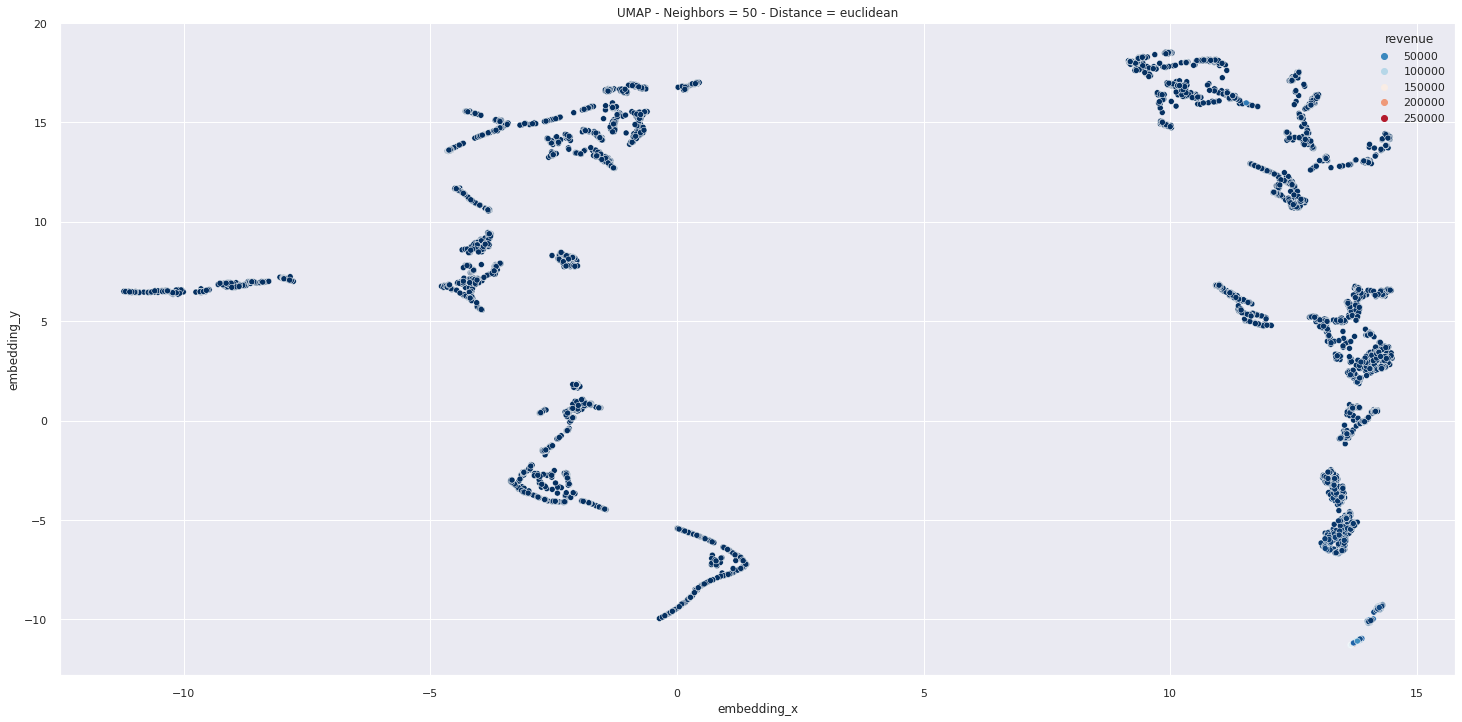

In [ ]:
# Euclidean distance
n_neighbors = 50
umap = UMAP(n_neighbors = n_neighbors, random_state = 42) 
res_umap = umap.fit_transform(df_leaf)
metric = umap.metric 

df_tree = df4.copy()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

cmap = sns.color_palette('RdBu_r', as_cmap = True)
plt.title('UMAP - Neighbors = {} - Distance = {}'.format(n_neighbors, metric) )
sns.scatterplot( data = df_tree, x = 'embedding_x', y = 'embedding_y', hue = 'revenue', palette = cmap);


In [ ]:
df_tree.sort_values('revenue', ascending = False).head()

customer_id         country  recency  avg_days_bw_purchases  num_purchases  date_range  frequency    revenue   avg_ticket  qty_items  avg_basket_size  avg_unique_prods  returns_revenue  avg_return_revenue  num_returns  qty_returned  embedding_x  embedding_y
844        14646     Netherlands        2               8.022727             73         353   0.206799  278778.02  3818.876986     197132      2663.945946         28.273973          -360.00         -180.000000          2.0        -288.0    13.700754   -11.240726
419        18102  United Kingdom        1              14.680000             60         367   0.163488  259657.30  4327.621667      64124      1068.733333          7.183333             0.00            0.000000          0.0           0.0    13.704624   -11.248878
372        17450  United Kingdom        9              13.807692             46         359   0.128134  189735.53  4124.685435      69041      1409.000000          7.304348         -4815.26        -1605.086667          3.0        -952.0    13.704883   -11.232183
65         14911            EIRE        2               2.861538            199         372   0.534946  133007.13   668.377538      77181       317.617284         28.492462         -7443.59          -33.379327        223.0       -3332.0    13.696462   -11.240731
912        12415       Australia       25              22.357143             20         313   0.063898  123638.18  6181.909000      77242      3218.416667         35.750000          -926.35          -15.186066         61.0        -427.0    13.674103   -11.275383

The distance metrics that worked better are: euclidean, manhattan

### 4.4.6 Consultation 

Let's see if our preprocessing has changed the embedded space

In [ ]:

# defining columns to be transformed
log_cols = ['recency','avg_days_bw_purchases'] 
min_max_cols = ['num_purchases','date_range','frequency','revenue','avg_ticket','avg_basket_size','avg_unique_prods','returns_revenue','avg_return_revenue','num_returns','qty_returned']

log1p = FunctionTransformer(np.log1p)

# applying log and standard scaler to log cols
log_pipe = Pipeline(steps = [ ('log', log1p), ('std', StandardScaler()) ] )
ct_log = ColumnTransformer( transformers = [ ('log', log_pipe, log_cols) ] ) 

# applying min_max scaler to min_max cols
min_max_pipe = make_pipeline( MinMaxScaler() )

# Label Encoding and std_scaler to catgorical columns
label_pipe = make_pipeline( OrdinalEncoder(), MinMaxScaler() )

preprocessor = ColumnTransformer( 
    transformers=[ ('log', log_pipe, log_cols), 
    ('min_max', min_max_pipe, min_max_cols) ] )
df_proper = preprocessor.fit_transform(df4)

# UMAP for 5 neighbors
n_neighbors = 5
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_proper)

df_viz_2 = df4.copy()
df_viz_2['embedding_x'] = embedding[:,0]
df_viz_2['embedding_y'] = embedding[:,1]

plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz_2, x = 'embedding_x', y = 'embedding_y', palette = 'bright' ); # hue = 'cluster'
df_unprep = df4.drop(['customer_id', 'country'], axis = 1).copy()
df_unprep.head()

# UMAP for 5 neighbors
n_neighbors = 5
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_unprep)

df_viz_3 = df4.copy()
df_viz_3['embedding_x'] = embedding[:,0]
df_viz_3['embedding_y'] = embedding[:,1]

plt.title('UMAP - Neighbors = {}'.format(n_neighbors) )
sns.scatterplot( data = df_viz_3, x = 'embedding_x', y = 'embedding_y', palette = 'bright' ); # hue = 'cluster'
### 4.4.3 UMAP Embedding
# Testing UMAP for 5, 15 and 25 neighbors
n_neighbors = 5
reducer = UMAP(n_neighbors = n_neighbors, random_state = 42)
embedding = reducer.fit_transform(df_prep)

df_viz = df4.copy()
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

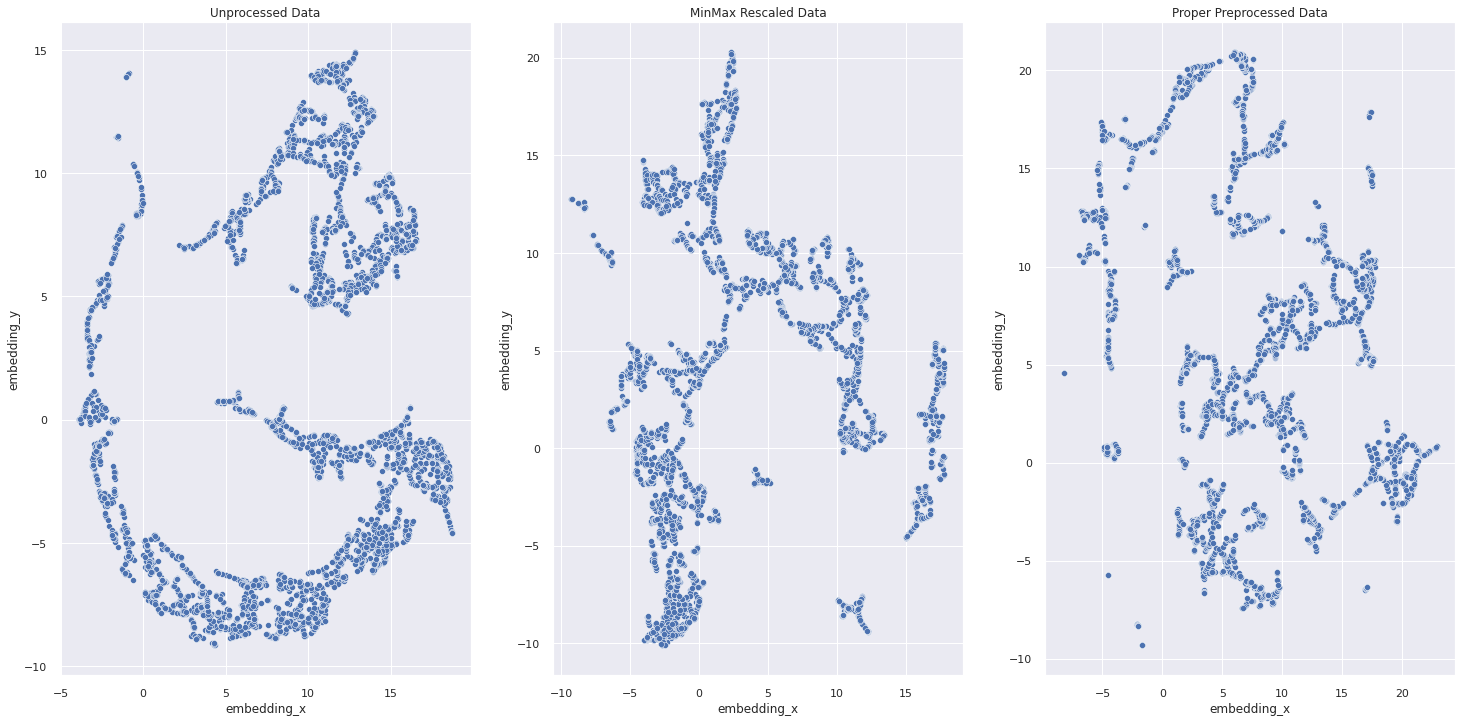

In [ ]:
fig, ax = plt.subplots(1, 3)
sns.scatterplot( data = df_viz_3, x = 'embedding_x', y = 'embedding_y', palette = 'bright', ax=ax[0] ); # hue = 'cluster'
sns.scatterplot( data = df_viz, x = 'embedding_x', y = 'embedding_y', palette = 'bright', ax=ax[1] ); # hue = 'cluster' 
sns.scatterplot( data = df_viz_2, x = 'embedding_x', y = 'embedding_y', palette = 'bright', ax=ax[2] ); # hue = 'cluster'
ax[0].set_title('Unprocessed Data');
ax[1].set_title('MinMax Rescaled Data');
ax[2].set_title('Proper Preprocessed Data');
plt.show()